# Definitions

The structure and properties of the class hierarchy of the ``finite_algebra`` module are based on the following definitions.

## Groups, Rings, Fields, etc.

The following list of algebraic structures is ordered such that each successive structure builds on the previous one.  The class hierarchy of the ``finite_algebra`` module is modeled on this progression.

* **Magma** -- $\langle S, \circ \rangle$, where $S$ is a set and $\circ$ is a binary operation, $\circ: S \times S \to S$, such that for each $a,b \in S$, $\exists! c \in S$ such that $a \circ b = c$

* **Semigroup** -- an associative Magma:  $\forall a,b,c \in S \Rightarrow a \circ (b \circ c) = (a \circ b) \circ c$

* **Monoid** -- a Semigroup with identity element:  $\exists e \in S$, such that, for all $a \in S, a \circ e = e \circ a = a$

* **Group** -- a Monoid with inverse elements:  $\forall a \in S, \exists a^{-1} \in S$, such that, $a \circ a^{-1} = a^{-1} 
\circ a = e$

* **Ring** -- $\langle S, +, \cdot \rangle$, where $\langle S, + \rangle$ is an abelian$^\dagger$ Group, $\langle S, \cdot \rangle$ is a Semigroup, and $\cdot$ distributes$^\ddagger$ over $+$

* **Field** -- a Ring $\langle S, +, \cdot \rangle$, where $\langle S\setminus{\{0\}}, \cdot \rangle$ is a commutative Group

$^\dagger$ An algebra is *abelian* (or *commutative*) for a binary operation, $\circ$, if $a \circ b = b \circ a$ for all $a,b \in S$.

$^\ddagger$ An operation, $\cdot$, *distributes* over another operation, $+$, if $a \cdot (b + c) = (a \cdot b) + (a \cdot c)$ for all $a,b,c \in S$.

For **Magmas**, **Semigroups**, **Monoids**, and **Groups**, the binary operation is often referred to as "*multiplication*", but may sometimes be called "*addition*".  Also, the identity element may be denoted by $0$ or $1$, rather than $e$, depending on whether the operation is called *addition* or *multiplication*, resp.

For **Rings** and **Fields**, the two operations, $+$ and $\cdot$, are usually referred to as addition and multiplication, resp.  The identity element for $+$ is often denoted by $0$, and $1$ for $\cdot$, if a multiplicative identity exists.

Regarding a **Ring's** Semigroup, $\langle S, \cdot \rangle$:

* if the Semigroup is abelian, then the Ring is called a "*commutative Ring*"
* if the Semigroup is actually a Monoid (i.e., has an identity element), then the Ring is called a "*unit Ring*" or "*Ring with identity*"

## Vector Spaces and Modules

In the definitions, below, care is taken to not conflate the scalar-scalar, vector-vector, and scalar-vector operations.

A **Vector Space**, $\mathscr{V} = \langle \mathscr{G}, \mathscr{F}, \circ \rangle$, consists of the following:

* an **abelian Group**, $\mathscr{G} = \langle V, \oplus \rangle$ (i.e., the *"vectors"*)
* a **field**, $\mathscr{F} = \langle S, +, \cdot \rangle$ (i.e., the *"scalars"*)
* and a **binary operator**, $\circ : S \times V \to V$

where the following conditions hold:

1. Scaled Vectors: For all $s \in S$ and $v \in V \Rightarrow s \circ v \in V$
1. Scaling by One: If $1 \in S$ is the multiplicative identity element of $\mathscr{F}$, then $1 \circ v = v$
1. Distributivity of Scalars Over Vector Addition: $s \circ (v_1 \oplus v_2) = (s \circ v_1) \oplus (s \circ v_2)$
1. Distributivity of Vectors Over Scalar Addition: $(s_1 + s_2) \circ v = (s_1 \circ v) \oplus (s_2 \circ v)$
1. Scalar-Vector Associativity: $s_1 \circ (s_2 \circ v) = (s_1 \cdot s_2) \circ v$

A **Module**, $\mathscr{M} = \langle \mathscr{G}, \mathscr{R}, \circ \rangle$, has the same conditions as a Vector Space, except that the Field is replaced by a **Ring**, $\mathscr{R} = \langle S, +, \cdot \rangle$.

## Class Hierarchy

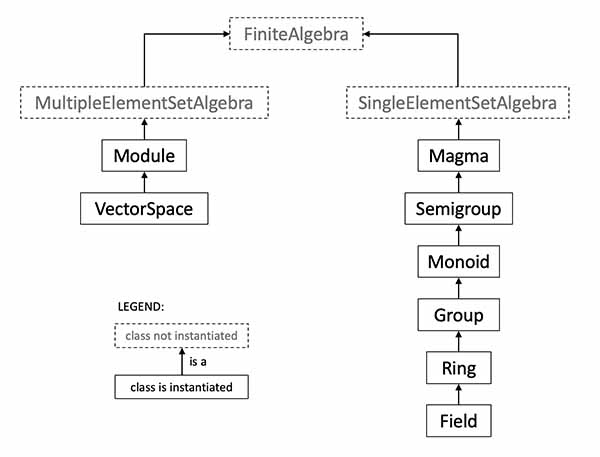

In [3]:
from IPython import display
from base64 import b64decode
base64_class_hierarchy = "/9j/4Q6MRXhpZgAATU0AKgAAAAgABwESAAMAAAABAAEAAAEaAAUAAAABAAAAYgEbAAUAAAABAAAAagEoAAMAAAABAAIAAAExAAIAAAAhAAAAcgEyAAIAAAAUAAAAk4dpAAQAAAABAAAAqAAAAPAALcbAAAAnEAAtxsAAACcQQWRvYmUgUGhvdG9zaG9wIDIyLjUgKE1hY2ludG9zaCkAMjAyMTowOToxOCAxMjoyNDo1OQAAAASShgAHAAAAEgAAAN6gAQADAAAAAf//AACgAgAEAAAAAQAAAligAwAEAAAAAQAAAckAAAAAQVNDSUkAAABTY3JlZW5zaG90AAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAT4BGwAFAAAAAQAAAUYBKAADAAAAAQACAAACAQAEAAAAAQAAAU4CAgAEAAAAAQAADTYAAAAAAAAASAAAAAEAAABIAAAAAf/Y/+0ADEFkb2JlX0NNAAH/7gAOQWRvYmUAZIAAAAAB/9sAhAAMCAgICQgMCQkMEQsKCxEVDwwMDxUYExMVExMYEQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMAQ0LCw0ODRAODhAUDg4OFBQODg4OFBEMDAwMDBERDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAz/wAARCABuAJADASIAAhEBAxEB/90ABAAJ/8QBPwAAAQUBAQEBAQEAAAAAAAAAAwABAgQFBgcICQoLAQABBQEBAQEBAQAAAAAAAAABAAIDBAUGBwgJCgsQAAEEAQMCBAIFBwYIBQMMMwEAAhEDBCESMQVBUWETInGBMgYUkaGxQiMkFVLBYjM0coLRQwclklPw4fFjczUWorKDJkSTVGRFwqN0NhfSVeJl8rOEw9N14/NGJ5SkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2N0dXZ3eHl6e3x9fn9xEAAgIBAgQEAwQFBgcHBgU1AQACEQMhMRIEQVFhcSITBTKBkRShsUIjwVLR8DMkYuFygpJDUxVjczTxJQYWorKDByY1wtJEk1SjF2RFVTZ0ZeLys4TD03Xj80aUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9ic3R1dnd4eXp7fH/9oADAMBAAIRAxEAPwD1VJJJJSkkkklMXWVtMOcGnwJATetT/pG/eFUqxcW7LzHW012O9Ro3OaCY9KrSXBG/Z+B/3Gq/zG/3JKZXZVNdZdvYXcMaXAS4/RZ/aUH5YZYa3vra5oBIc4iA6dknbt921Rt6X0+xoH2ancxwfW41tO17TurtZp7bK3fQentwmXO32src6QZIM6BzG/nfu2PSUt9urifVp0cGn36hxc2prSI+l6j2sS+31w0+rT7iAJfrLtu0Rt/lsQz0jEJM01mRBkOOkEfv/wApRb0XEbu9jXbiSS4uJEncWNIc39H/ACElNn7STW6xprexmri18x38ERuRjuaHNtYWuALSHAgg6ghV29Pra21jGVtF4DbRtLgWtHptZtc7bt9P2bFNnTOm1sbWzEpYxgDWNbW0ANaNrWtaG+1rWpKTetT/AKRv3hJttbjDXtJ8AQUL9n4H/car/Mb/AHKvlYmLVbiPqprrd67Yc1rQfo2dwElOgkkkkpSSSSSn/9D1GyxzXNa1u4vnvEQJQmZjXhxYa3Bg3PIsBhsubud/J3V2N/629Fsa8vY9gB2zIJjkfBypfsjGDtwoaDO4xa/XXdB9v0N/6TZ/pElNoZDjEBh3aNh41MboGn7rUzMk2T6YY/bo7a8GCJHu0/kqmeiYp3TS0hzQ3b6joAAjT2fyW/TUndHxnFpfjsfskNDrHEAE79sbP3ikpPULqrL7XNbtteHj38AMZX7vb/wakcxor9Wa/T19/qDb7QS/3fyNj1Qp6bhW3ZNf2EM9F7Wb3PO10sru30bdzmsbv9L3en/23/OGPR8cve91LXPs+k42Okg79zPoe2t7bX7q2exJTbOQ4NLyGBjZ3O3iBGjtxj83apepdx6Ykc+7/wAxWf8AsLF9V1pqDiQAA6wnbA2e1xr9T/Pej4/T68W31aKWsfs9P+cdET6nGz6W785JTcrfvra+I3AGPiFJQqYWVMYTJa0An4BTSUhtyPTc4ENDWhpL3uDRLiWNbr8E3rvADi1gBIAO8QSfo9vztyjkY7rvUaQHV2Na0jcWn2lztHNa795VH9DxXva/0QA1rmlgsdDt35z3en6u/wD4Rr96Sm63ILnmtoY57fpMDwSP6zY80PIZfd6Lg1oFVgsMu5ADm/u/ykA9HxiGB1DS2syxpsdAkBjoaGbfzUDL6fhY2x37PFovsZQ5tb9GB59P1nb/AE9tde73+j+k/kb0lOi3K3jczY5oO0kWAjdO3Zx9LVJmSbGepWGPZG7c2wEQQHzuA/cc16qno+OXiw0gvAhrvUd7Y2/zfs/R/Q/MUP2FiGwO9EbWgNbUbCWiDv8AbNe//p7P/A0lN9ttrgC1jSCJBD5BB7/RU6niytlgEB7Q6DyJEqnR0ynHsrtqpa19e6D6juXhrXud7Pd9BXKWGullZ1LGhpI8hCSn/9H1VJJJJSlz2Rm5eMMYMwcrNbbTXY+6q23RxP6drmN9m70BZbT7/wBJd6eP+h9X1Vt2ZVVdnpu3lwAcQ1j36EkDWtjm/mqsGdPaA1tVzWjQAV3gAeQ2pKckdSua64t6Xmhzw0sIdke+z+bfvPt2V+i1llVjvzP0d/2bI/QrU6da65uPkGq/FNzLN2PkOcXt2uaGb2PfY1rvz0Kiuht+U60ZLq32NNLXNtLWtFdTXNq2sDmsda2x7vU/wu9Wa34Vb/UZXbvgiTVcdDz9Jh/dSU3UkOm6u5m+uYktO4FpBBgy14a5ESUpJJJJSkkkklNDqb7mNc+lj7rKse62vHY91fqWM9P0q99Xu9/0PovWNf1ttZY3J6ZnNFlzW4+59sEzX6PqFzmtrve42enQz1f5r+Wty23CvcHPZY81lzQ5tdvjteA9jPc3dWquZXS5tX2c5VRbdW5/pttG5gd+krs9St/6FzP5zZ+kSUgpzLb3Oosws3Ff6NtvqvssNbSzYGM9Xfs9S31HbGf8C9bjTLQT4KiW9PcC01XFp0INd8EH+yrdV9dshm4FsSHNcw68e2xrElJEkkklP//S9VSSSSU0c2p9hyK9tgbfS2tttUS1wNvub7m++vex6yh0jqAa4ftDNdudvaSILXTW4lvpXVsc1zmWforWW1e//jvtHRpJKebd0bP312szcptrZFljm7iWS17aqt1/6Jtexm36fr/96H25Gw+n9SoyaLrs7LyG0ue59TmtDX7g5rWP/SH2U7t1X5/+mfb+r/Z95JJTXw2vDHl7SzfY9wDomCdOJVhJJJSkkkklKSSSSU4Wb07JyRV6dl+JbQbx6lTQ4ltrw/2l1mxm5rP5xrPtP+iuo/TepSzsHLx20H9qZVDrr66t1wLt7rHN/Q1mp26n1Xs/4LH/AMH7Ft9UzXYdT75cKqabb7Axm97vT2eyphLdz3b/AKCzD9Y+lXsl3USxjLJDhVLXCo+p6vqViyv7M6tn2j1d39F/WP5pJS13Suqua9lHUMtjHkQHt3ENH/CtvZbv2Pdu2uYyz08b+b/WftW3jB5sse5rmghjQXwCS0Hc6GfFZVfXse+52NjZbrLw17o9KANjd/6Tfsczd+59NbjTIB8QkpdJJJJT/9P1VJJJJSkklR6jiVZjm1vfc30hucKX7AQTLd7vb+dT+akpvJLHo6Hj03VXNfmF9R3CbgWky4+6vd6f5+32t/mv0P8AM+xanqu/0Tv+j/5NJSRJD9V3+id/0f8Ayaeu0PJG0tIAOscGY+iXfupKZpJJJKUkkkkprZbKd7LLMj7O4BzRqwbgS1zv55r/ANxqz8wir0bMXOq3m2qu02Con0i6Htq9NjNtnu/R7/0f/Bq9kWUV5lLrnNY012AF5AE7qdPcserK661kHJ6e927bNjgZkHe6afR2Ub/5irZZf6f87akp0DRg7dozQ0BhrBb6AIa76TGxT7W6LSAgQOyxMXOybKcz9onEqaWkY7KntcSC1xdudvdv+lXX9Cv9J636P0/TW236I+CSl0kkklP/1PVUkkklKQLsYWl0kFrw0Oa4E/QJe36LmfnOR1QyrYybWutcwV0tfXW1zWFzibd3us/4uv8AOSUodIxWsLBXXtMGNruW7g0/zv8ALeqeRThU5Zpyaqa6Ayhld3vk2WusxKqPSYfYzbVW1lnqf4RRbnZpa7dj3Nc0e0DKxyHGQNrXbv3Nz/eoOystuQ97Me10/o/UGVRBY1z/AEn7HO/lus/0n6T8/wDwaU3MbB6ZmUsysYVWVOk1va1wGhg7f0g/OYr1FApG0RtaxtbGtBADWTt5c795Yh6j1McYdpO2f6Xjxu/c53bf3n7VrYrwci2tlxuY1jHAkh0EmwO1b/UakptpJJJKUkkkkpFkWuqr3taHuLmtDSdol7m1/Sh37yzs22nLtZi2/ZHX4l1N5rfbLmOa4Pqfs9L2Pd/g3LRya32VbWEBwcxw3cexzbI0/qrI6l0zHN7cu7p9eVdkW112ubYWwHRQ2+1r3MZY3Hb9Bjf0v+h/PSU6Tcu3dXuZWWWPNZdXYXQ4B+7T02fRfXsd7laWZ07pJwMXGwqSBj4r3PaXuL3nd6ji3dsq/PtWmkpSSSSSn//V9VSSSSUpMWtPIB+KdJJTHYz90fclsZ+6PuUkklMdjP3R9ycADgR8E6SSlJJJJKUkkkkpBmAmgCSN1lYJaS0wbGNd7mFrli5tufXdZW3p12Qw2luM8WWFo2MrsZkXfpd3uyH2Mr9jP5pbuR6HpH149PSd3EyNn9rf9FVf8l+X/SSU1cC2+5lORbRbhvOQ6sVWWWOOwNf/ADjbSGu3O/kel/obLv0d79hU6v2b6rNm31J/RzPMH6O787ZuVxJSkkkklP8A/9n/7RbuUGhvdG9zaG9wIDMuMAA4QklNBAQAAAAAAAccAgAAAgAAADhCSU0EJQAAAAAAEOjxXPMvwRihontnrcVk1bo4QklNBDoAAAAAAU8AAAAQAAAAAQAAAAAAC3ByaW50T3V0cHV0AAAABwAAAABDbHJTZW51bQAAAABDbHJTAAAAAFJHQkMAAAAATm0gIFRFWFQAAAAMAEUAUABTAE8ATgAgACAAcwBSAEcAQgAAAAAAAEludGVlbnVtAAAAAEludGUAAAAASW1nIAAAAABNcEJsYm9vbAEAAAAPcHJpbnRTaXh0ZWVuQml0Ym9vbAAAAAALcHJpbnRlck5hbWVURVhUAAAAFABDAGEAbgBvAG4AIABNAEcANwA3ADAAMAAgAHMAZQByAGkAZQBzAAAAAAAPcHJpbnRQcm9vZlNldHVwT2JqYwAAAAwAUAByAG8AbwBmACAAUwBlAHQAdQBwAAAAAAAKcHJvb2ZTZXR1cAAAAAEAAAAAQmx0bmVudW0AAAAMYnVpbHRpblByb29mAAAACXByb29mQ01ZSwA4QklNBDsAAAAAAi0AAAAQAAAAAQAAAAAAEnByaW50T3V0cHV0T3B0aW9ucwAAABcAAAAAQ3B0bmJvb2wAAAAAAENsYnJib29sAAAAAABSZ3NNYm9vbAAAAAAAQ3JuQ2Jvb2wAAAAAAENudENib29sAAAAAABMYmxzYm9vbAAAAAAATmd0dmJvb2wAAAAAAEVtbERib29sAAAAAABJbnRyYm9vbAAAAAAAQmNrZ09iamMAAAABAAAAAAAAUkdCQwAAAAMAAAAAUmQgIGRvdWJAb+AAAAAAAAAAAABHcm4gZG91YkBv4AAAAAAAAAAAAEJsICBkb3ViQG/gAAAAAAAAAAAAQnJkVFVudEYjUmx0AAAAAAAAAAAAAAAAQmxkIFVudEYjUmx0AAAAAAAAAAAAAAAAUnNsdFVudEYjUHhsQHLAAAAAAAAAAAAKdmVjdG9yRGF0YWJvb2wBAAAAAFBnUHNlbnVtAAAAAFBnUHMAAAAAUGdQQwAAAABMZWZ0VW50RiNSbHQAAAAAAAAAAAAAAABUb3AgVW50RiNSbHQAAAAAAAAAAAAAAABTY2wgVW50RiNQcmNAWQAAAAAAAAAAABBjcm9wV2hlblByaW50aW5nYm9vbAAAAAAOY3JvcFJlY3RCb3R0b21sb25nAAAAAAAAAAxjcm9wUmVjdExlZnRsb25nAAAAAAAAAA1jcm9wUmVjdFJpZ2h0bG9uZwAAAAAAAAALY3JvcFJlY3RUb3Bsb25nAAAAAAA4QklNA+0AAAAAABABLAAAAAEAAQEsAAAAAQABOEJJTQQmAAAAAAAOAAAAAAAAAAAAAD+AAAA4QklNBA0AAAAAAAQAAAAeOEJJTQQZAAAAAAAEAAAAHjhCSU0D8wAAAAAACQAAAAAAAAAAAQA4QklNJxAAAAAAAAoAAQAAAAAAAAABOEJJTQP1AAAAAABIAC9mZgABAGxmZgAGAAAAAAABAC9mZgABAKGZmgAGAAAAAAABADIAAAABAFoAAAAGAAAAAAABADUAAAABAC0AAAAGAAAAAAABOEJJTQP4AAAAAABwAAD/////////////////////////////A+gAAAAA/////////////////////////////wPoAAAAAP////////////////////////////8D6AAAAAD/////////////////////////////A+gAADhCSU0EAAAAAAAAAgAAOEJJTQQCAAAAAAACAAA4QklNBDAAAAAAAAEBADhCSU0ELQAAAAAABgABAAAAAjhCSU0ECAAAAAAAEAAAAAEAAAJAAAACQAAAAAA4QklNBB4AAAAAAAQAAAAAOEJJTQQaAAAAAANTAAAABgAAAAAAAAAAAAAByQAAAlgAAAAPAGMAbABhAHMAcwBfAGgAaQBlAHIAYQByAGMAaAB5AAAAAQAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAJYAAAByQAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAABAAAAABAAAAAAAAbnVsbAAAAAIAAAAGYm91bmRzT2JqYwAAAAEAAAAAAABSY3QxAAAABAAAAABUb3AgbG9uZwAAAAAAAAAATGVmdGxvbmcAAAAAAAAAAEJ0b21sb25nAAAByQAAAABSZ2h0bG9uZwAAAlgAAAAGc2xpY2VzVmxMcwAAAAFPYmpjAAAAAQAAAAAABXNsaWNlAAAAEgAAAAdzbGljZUlEbG9uZwAAAAAAAAAHZ3JvdXBJRGxvbmcAAAAAAAAABm9yaWdpbmVudW0AAAAMRVNsaWNlT3JpZ2luAAAADWF1dG9HZW5lcmF0ZWQAAAAAVHlwZWVudW0AAAAKRVNsaWNlVHlwZQAAAABJbWcgAAAABmJvdW5kc09iamMAAAABAAAAAAAAUmN0MQAAAAQAAAAAVG9wIGxvbmcAAAAAAAAAAExlZnRsb25nAAAAAAAAAABCdG9tbG9uZwAAAckAAAAAUmdodGxvbmcAAAJYAAAAA3VybFRFWFQAAAABAAAAAAAAbnVsbFRFWFQAAAABAAAAAAAATXNnZVRFWFQAAAABAAAAAAAGYWx0VGFnVEVYVAAAAAEAAAAAAA5jZWxsVGV4dElzSFRNTGJvb2wBAAAACGNlbGxUZXh0VEVYVAAAAAEAAAAAAAlob3J6QWxpZ25lbnVtAAAAD0VTbGljZUhvcnpBbGlnbgAAAAdkZWZhdWx0AAAACXZlcnRBbGlnbmVudW0AAAAPRVNsaWNlVmVydEFsaWduAAAAB2RlZmF1bHQAAAALYmdDb2xvclR5cGVlbnVtAAAAEUVTbGljZUJHQ29sb3JUeXBlAAAAAE5vbmUAAAAJdG9wT3V0c2V0bG9uZwAAAAAAAAAKbGVmdE91dHNldGxvbmcAAAAAAAAADGJvdHRvbU91dHNldGxvbmcAAAAAAAAAC3JpZ2h0T3V0c2V0bG9uZwAAAAAAOEJJTQQoAAAAAAAMAAAAAj/wAAAAAAAAOEJJTQQUAAAAAAAEAAAAAzhCSU0EDAAAAAANUgAAAAEAAACQAAAAbgAAAbAAALmgAAANNgAYAAH/2P/tAAxBZG9iZV9DTQAB/+4ADkFkb2JlAGSAAAAAAf/bAIQADAgICAkIDAkJDBELCgsRFQ8MDA8VGBMTFRMTGBEMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAENCwsNDg0QDg4QFA4ODhQUDg4ODhQRDAwMDAwREQwMDAwMDBEMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwM/8AAEQgAbgCQAwEiAAIRAQMRAf/dAAQACf/EAT8AAAEFAQEBAQEBAAAAAAAAAAMAAQIEBQYHCAkKCwEAAQUBAQEBAQEAAAAAAAAAAQACAwQFBgcICQoLEAABBAEDAgQCBQcGCAUDDDMBAAIRAwQhEjEFQVFhEyJxgTIGFJGhsUIjJBVSwWIzNHKC0UMHJZJT8OHxY3M1FqKygyZEk1RkRcKjdDYX0lXiZfKzhMPTdePzRieUpIW0lcTU5PSltcXV5fVWZnaGlqa2xtbm9jdHV2d3h5ent8fX5/cRAAICAQIEBAMEBQYHBwYFNQEAAhEDITESBEFRYXEiEwUygZEUobFCI8FS0fAzJGLhcoKSQ1MVY3M08SUGFqKygwcmNcLSRJNUoxdkRVU2dGXi8rOEw9N14/NGlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vYnN0dXZ3eHl6e3x//aAAwDAQACEQMRAD8A9VSSSSUpJJJJTF1lbTDnBp8CQE3rU/6Rv3hVKsXFuy8x1tNdjvUaNzmgmPSq0lwRv2fgf9xqv8xv9ySmV2VTXWXb2F3DGlwEuP0Wf2lB+WGWGt762uaASHOIgOnZJ27fdtUbel9PsaB9mp3McH1uNbTte07q7Wae2yt30Hp7cJlzt9rK3OkGSDOgcxv537tj0lLfbq4n1adHBp9+ocXNqa0iPpeo9rEvt9cNPq0+4gCX6y7btEbf5bEM9IxCTNNZkQZDjpBH7/8AKUW9FxG7vY124kkuLiRJ3FjSHN/R/wAhJTZ+0k1usaa3sZq4tfMd/BEbkY7mhzbWFrgC0hwIIOoIVdvT62ttYxlbReA20bS4FrR6bWbXO27fT9mxTZ0zptbG1sxKWMYA1jW1tADWja1rWhvta1qSk3rU/wCkb94SbbW4w17SfAEFC/Z+B/3Gq/zG/wByr5WJi1W4j6qa63eu2HNa0H6NncBJToJJJJKUkkkkp//Q9Rssc1zWtbuL57xECUJmY14cWGtwYNzyLAYbLm7nfyd1djf+tvRbGvL2PYAdsyCY5HwcqX7Ixg7cKGgzuMWv113Qfb9Df+k2f6RJTaGQ4xAYd2jYeNTG6Bp+61MzJNk+mGP26O2vBgiR7tP5KpnomKd00tIc0N2+o6AAI09n8lv01J3R8ZxaX47H7JDQ6xxABO/bGz94pKT1C6qy+1zW7bXh49/ADGV+72/8GpHMaK/Vmv09ff6g2+0Ev938jY9UKem4Vt2TX9hDPRe1m9zztdLK7t9G3c5rG7/S93p/9t/zhj0fHL3vdS1z7PpONjpIO/cz6Htre21+6tnsSU2zkODS8hgY2dzt4gRo7cY/N2qXqXcemJHPu/8AMVn/ALCxfVdaag4kAAOsJ2wNntca/U/z3o+P0+vFt9WilrH7PT/nHRE+pxs+lu/OSU3K3762viNwBj4hSUKmFlTGEyWtAJ+AU0lIbcj03OBDQ1oaS97g0S4ljW6/BN67wA4tYASADvEEn6Pb87co5GO671GkB1djWtI3Fp9pc7RzWu/eVR/Q8V72v9EANa5pYLHQ7d+c93p+rv8A+Ea/ekputyC55raGOe36TA8Ej+s2PNDyGX3ei4NaBVYLDLuQA5v7v8pAPR8YhgdQ0trMsabHQJAY6Ghm381Ay+n4WNsd+zxaL7GUObW/RgefT9Z2/wBPbXXu9/o/pP5G9JTotyt43M2OaDtJFgI3Tt2cfS1SZkmxnqVhj2Ru3NsBEEB87gP3HNeqp6Pjl4sNILwIa71He2Nv837P0f0PzFD9hYhsDvRG1oDW1Gwlog7/AGzXv/6ez/wNJTfbba4AtY0giQQ+QQe/0VOp4srZYBAe0Og8iRKp0dMpx7K7aqWtfXug+o7l4a17nez3fQVylhrpZWdSxoaSPIQkp//R9VSSSSUpc9kZuXjDGDMHKzW2012Puqtt0cT+na5jfZu9AWW0+/8ASXenj/ofV9VbdmVVXZ6bt5cAHENY9+hJA1rY5v5qrBnT2gNbVc1o0AFd4AHkNqSnJHUrmuuLel5oc8NLCHZHvs/m37z7dlfotZZVY78z9Hf9myP0K1OnWuubj5BqvxTcyzdj5DnF7drmhm9j32Na789CorobflOtGS6t9jTS1zbS1rRXU1zatrA5rHWtse71P8LvVmt+FW/1GV274Ik1XHQ8/SYf3UlN1JDpuruZvrmJLTuBaQQYMteGuRElKSSSSUpJJJJTQ6m+5jXPpY+6yrHutrx2PdX6ljPT9KvfV7vf9D6L1jX9bbWWNyemZzRZc1uPufbBM1+j6hc5ra73uNnp0M9X+a/lrcttwr3Bz2WPNZc0ObXb47XgPYz3N3VqrmV0ubV9nOVUW3Vuf6bbRuYHfpK7PUrf+hcz+c2fpElIKcy29zqLMLNxX+jbb6r7LDW0s2BjPV37PUt9R2xn/AvW40y0E+ColvT3AtNVxadCDXfBB/sq3VfXbIZuBbEhzXMOvHtsaxJSRJJJJT//0vVUkkklNHNqfYcivbYG30trbbVEtcDb7m+5vvr3sesodI6gGuH7QzXbnb2kiC101uJb6V1bHNc5ln6K1ltXv/477R0aSSnm3dGz99drM3Kba2RZY5u4lkte2qrdf+ibXsZt+n6//eh9uRsPp/UqMmi67Oy8htLnufU5rQ1+4Oa1j/0h9lO7dV+f/pn2/q/2feSSU18Nrwx5e0s32PcA6JgnTiVYSSSUpJJJJSkkkklOFm9OyckVenZfiW0G8epU0OJba8P9pdZsZuaz+caz7T/orqP03qUs7By8dtB/amVQ66+urdcC7e6xzf0NZqdup9V7P+Cx/wDB+xbfVM12HU++XCqmm2+wMZve709nsqYS3c92/wCgsw/WPpV7Jd1EsYyyQ4VS1wqPqer6lYsr+zOrZ9o9Xd/Rf1j+aSUtd0rqrmvZR1DLYx5EB7dxDR/wrb2W79j3btrmMs9PG/m/1n7Vt4webLHua5oIY0F8AktB3OhnxWVX17HvudjY2W6y8Ne6PSgDY3f+k37HM3fufTW40yAfEJKXSSSSU//T9VSSSSUpJJUeo4lWY5tb33N9IbnCl+wEEy3e72/nU/mpKbySx6Oh49N1VzX5hfUdwm4FpMuPur3en+ft9rf5r9D/ADPsWp6rv9E7/o/+TSUkSQ/Vd/onf9H/AMmnrtDyRtLSADrHBmPol37qSmaSSSSlJJJJKa2WyneyyzI+zuAc0asG4Etc7+ea/wDcas/MIq9GzFzqt5tqrtNgqJ9Iuh7avTYzbZ7v0e/9H/wavZFlFeZS65zWNNdgBeQBO6nT3LHqyuutZByenvdu2zY4GZB3umn0dlG/+Yq2WX+n/O2pKdA0YO3aM0NAYawW+gCGu+kxsU+1ui0gIEDssTFzsmynM/aJxKmlpGOyp7XEgtcXbnb3b/pV1/Qr/Set+j9P01tt+iPgkpdJJJJT/9T1VJJJJSkC7GFpdJBa8NDmuBP0CXt+i5n5zkdUMq2Mm1rrXMFdLX11tc1hc4m3d7rP+Lr/ADklKHSMVrCwV17TBja7lu4NP87/AC3qnkU4VOWacmqmugMoZXd75NlrrMSqj0mH2M21VtZZ6n+EUW52aWu3Y9zXNHtAyschxkDa1279zc/3qDsrLbkPezHtdP6P1BlUQWNc/wBJ+xzv5brP9J+k/P8A8GlNzGwemZlLMrGFVlTpNb2tcBoYO39IPzmK9RQKRtEbWsbWxrQQA1k7eXO/eWIeo9THGHaTtn+l48bv3Od2395+1a2K8HItrZcbmNYxwJIdBJsDtW/1GpKbaSSSSlJJJJKRZFrqq97Wh7i5rQ0naJe5tf0od+8s7Ntpy7WYtv2R1+JdTea32y5jmuD6n7PS9j3f4Ny0cmt9lW1hAcHMcN3Hsc2yNP6qyOpdMxze3Lu6fXlXZFtddrm2FsB0UNvta9zGWNx2/QY39L/ofz0lOk3Lt3V7mVlljzWXV2F0OAfu09Nn0X17He5WlmdO6ScDFxsKkgY+K9z2l7i953eo4t3bKvz7VppKUkkkkp//1fVUkkklKTFrTyAfinSSUx2M/dH3JbGfuj7lJJJTHYz90fcnAA4EfBOkkpSSSSSlJJJJKQZgJoAkjdZWCWktMGxjXe5ha5Yubbn13WVt6ddkMNpbjPFlhaNjK7GZF36Xd7sh9jK/Yz+aW7keh6R9ePT0ndxMjZ/a3/RVX/Jfl/0klNXAtvuZTkW0W4bzkOrFVlljjsDX/wA420hrtzv5Hpf6Gy79He/YVOr9m+qzZt9Sf0czzB+ju/O2blcSUpJJJJT/AP/ZOEJJTQQhAAAAAABXAAAAAQEAAAAPAEEAZABvAGIAZQAgAFAAaABvAHQAbwBzAGgAbwBwAAAAFABBAGQAbwBiAGUAIABQAGgAbwB0AG8AcwBoAG8AcAAgADIAMAAyADEAAAABADhCSU0EBgAAAAAAB///AAAAAQEA/+EPnWh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNy4xLWMwMDAgNzkuZGFiYWNiYiwgMjAyMS8wNC8xNC0wMDozOTo0NCAgICAgICAgIj4gPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4gPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIiB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iIHhtbG5zOnBob3Rvc2hvcD0iaHR0cDovL25zLmFkb2JlLmNvbS9waG90b3Nob3AvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0RXZ0PSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VFdmVudCMiIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRlRGF0ZT0iMjAyMS0wOS0xOFQxMjoyMToxMy0wNTowMCIgeG1wOk1vZGlmeURhdGU9IjIwMjEtMDktMThUMTI6MjQ6NTktMDU6MDAiIHhtcDpNZXRhZGF0YURhdGU9IjIwMjEtMDktMThUMTI6MjQ6NTktMDU6MDAiIGRjOmZvcm1hdD0iaW1hZ2UvanBlZyIgcGhvdG9zaG9wOkNvbG9yTW9kZT0iMyIgcGhvdG9zaG9wOklDQ1Byb2ZpbGU9IkRpc3BsYXkiIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6NzQ0NmUzYzktMDAwNy00ZDRjLWI1MWQtOGIxZmFlNDQyMjFmIiB4bXBNTTpEb2N1bWVudElEPSJhZG9iZTpkb2NpZDpwaG90b3Nob3A6MWI2NjI4NzItZGNkYy00NzQyLTgyNTQtYjEyNzMwODhmOGI0IiB4bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ9InhtcC5kaWQ6MGY5YjI5YTMtOTlmMi00OGMwLWI2YjAtNzQ1OGU1NzAwYjg3Ij4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6U2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6MGY5YjI5YTMtOTlmMi00OGMwLWI2YjAtNzQ1OGU1NzAwYjg3IiBzdEV2dDp3aGVuPSIyMDIxLTA5LTE4VDEyOjI0OjU5LTA1OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgMjIuNSAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0iY29udmVydGVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJmcm9tIGltYWdlL3BuZyB0byBpbWFnZS9qcGVnIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJkZXJpdmVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJjb252ZXJ0ZWQgZnJvbSBpbWFnZS9wbmcgdG8gaW1hZ2UvanBlZyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6NzQ0NmUzYzktMDAwNy00ZDRjLWI1MWQtOGIxZmFlNDQyMjFmIiBzdEV2dDp3aGVuPSIyMDIxLTA5LTE4VDEyOjI0OjU5LTA1OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgMjIuNSAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHhtcE1NOkRlcml2ZWRGcm9tIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6MGY5YjI5YTMtOTlmMi00OGMwLWI2YjAtNzQ1OGU1NzAwYjg3IiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjBmOWIyOWEzLTk5ZjItNDhjMC1iNmIwLTc0NThlNTcwMGI4NyIgc3RSZWY6b3JpZ2luYWxEb2N1bWVudElEPSJ4bXAuZGlkOjBmOWIyOWEzLTk5ZjItNDhjMC1iNmIwLTc0NThlNTcwMGI4NyIvPiA8L3JkZjpEZXNjcmlwdGlvbj4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+INWElDQ19QUk9GSUxFAAEBAAANSGFwcGwCEAAAbW50clJHQiBYWVogB+UACQAOABIANAAWYWNzcEFQUEwAAAAAQVBQTAAAAAAAAAAAAAAAAAAAAAAAAPbWAAEAAAAA0y1hcHBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASZGVzYwAAAVwAAABiZHNjbQAAAcAAAAHqY3BydAAAA6wAAAAjd3RwdAAAA9AAAAAUclhZWgAAA+QAAAAUZ1hZWgAAA/gAAAAUYlhZWgAABAwAAAAUclRSQwAABCAAAAgMYWFyZwAADCwAAAAgdmNndAAADEwAAAAwbmRpbgAADHwAAAA+Y2hhZAAADLwAAAAsbW1vZAAADOgAAAAodmNncAAADRAAAAA4YlRSQwAABCAAAAgMZ1RSQwAABCAAAAgMYWFiZwAADCwAAAAgYWFnZwAADCwAAAAgZGVzYwAAAAAAAAAIRGlzcGxheQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG1sdWMAAAAAAAAAJgAAAAxockhSAAAACAAAAdhrb0tSAAAACAAAAdhuYk5PAAAACAAAAdhpZAAAAAAACAAAAdhodUhVAAAACAAAAdhjc0NaAAAACAAAAdhkYURLAAAACAAAAdhubE5MAAAACAAAAdhmaUZJAAAACAAAAdhpdElUAAAACAAAAdhlc0VTAAAACAAAAdhyb1JPAAAACAAAAdhmckNBAAAACAAAAdhhcgAAAAAACgAAAeB1a1VBAAAACAAAAdhoZUlMAAAACAAAAdh6aFRXAAAACAAAAdh2aVZOAAAACAAAAdhza1NLAAAACAAAAdh6aENOAAAACAAAAdhydVJVAAAACAAAAdhlbkdCAAAACAAAAdhmckZSAAAACAAAAdhtcwAAAAAACAAAAdhoaUlOAAAACAAAAdh0aFRIAAAACAAAAdhjYUVTAAAACAAAAdhlbkFVAAAACAAAAdhlc1hMAAAACAAAAdhkZURFAAAACAAAAdhlblVTAAAACAAAAdhwdEJSAAAACAAAAdhwbFBMAAAACAAAAdhlbEdSAAAACAAAAdhzdlNFAAAACAAAAdh0clRSAAAACAAAAdhwdFBUAAAACAAAAdhqYUpQAAAACAAAAdgAaQBNAGEAYyAPAGkATQBhAGMAAHRleHQAAAAAQ29weXJpZ2h0IEFwcGxlIEluYy4sIDIwMjEAAFhZWiAAAAAAAADzFgABAAAAARbKWFlaIAAAAAAAAIO1AAA9vv///7tYWVogAAAAAAAAS5AAALMnAAAK0FhZWiAAAAAAAAAnkQAADxsAAMihY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA2ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKMAqACtALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t//9wYXJhAAAAAAADAAAAAmZmAADypwAADVkAABPQAAAKW3ZjZ3QAAAAAAAAAAQABAAAAAAAAAAEAAAABAAAAAAAAAAEAAAABAAAAAAAAAAEAAG5kaW4AAAAAAAAANgAArgAAAFIAAABDwAAAsMAAACZAAAAOAAAAUAAAAFRAAAIzMwACMzMAAjMzAAAAAAAAAABzZjMyAAAAAAABDHIAAAX4///zHQAAB7oAAP1y///7nf///aQAAAPZAADAcW1tb2QAAAAAAAAGEAAArgfHbbwp0bovgAAAAAAAAAAAAAAAAAAAAAB2Y2dwAAAAAAADAAAAAmZmAAMAAAACZmYAAwAAAAJmZgAAAAIzMzQAAAAAAjMzNAAAAAACMzM0AP/uAA5BZG9iZQBkgAAAAAH/2wCEABIODg4QDhUQEBUeExETHiMaFRUaIyIXFxcXFyIRDAwMDAwMEQwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwBFBMTFhkWGxcXGxQODg4UFA4ODg4UEQwMDAwMEREMDAwMDAwRDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAckCWAMBIgACEQEDEQH/3QAEACb/xAE/AAABBQEBAQEBAQAAAAAAAAADAAECBAUGBwgJCgsBAAEFAQEBAQEBAAAAAAAAAAEAAgMEBQYHCAkKCxAAAQQBAwIEAgUHBggFAwwzAQACEQMEIRIxBUFRYRMicYEyBhSRobFCIyQVUsFiMzRygtFDByWSU/Dh8WNzNRaisoMmRJNUZEXCo3Q2F9JV4mXys4TD03Xj80YnlKSFtJXE1OT0pbXF1eX1VmZ2hpamtsbW5vY3R1dnd4eXp7fH1+f3EQACAgECBAQDBAUGBwcGBTUBAAIRAyExEgRBUWFxIhMFMoGRFKGxQiPBUtHwMyRi4XKCkkNTFWNzNPElBhaisoMHJjXC0kSTVKMXZEVVNnRl4vKzhMPTdePzRpSkhbSVxNTk9KW1xdXl9VZmdoaWprbG1ub2JzdHV2d3h5ent8f/2gAMAwEAAhEDEQA/AO4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//0O4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJM5zWtLnGGtEkngAJKa+a257a66w4tfYBa5jjW5lcPe61llbmP+m2tSOK0urdvs/RAAD1HQ6P+5Hu/T/8AXUPIdVaMaxl4aw2tcwtMtu9tv6vvY7/Cf+i1bSUgGK0Gw77P0oII9R0Nn/uP7v0H/WlE4bDU2r1LYYZDhY/eZ/0l2/1LE2fk249dZqa177LG1gOJa33/ANVQddn149tloore2PTJe70+f0nr2OYzYkpsfZ2+v6298xGze70//Yfd6SGMJgqdV6lsOMlxsfvH9S7f6jFK3MxaZF1rKy2NwLgI3fQTXXuBoNTqyy14BL3RuaQ536ps/nbUlLnFaXVu32fogABvdDo/07d36f8A66kMVoNp9Sz9LIP6R0Nn/uP7v1f/AK0hY/U8W/Isoa4BzHbWe4fpdN73U/8AForMzEstNLLmOtHLA4F2n0klMThsNTa/UthhJDhY/eZ/0lu/fYifZ2+v6298kRs3u9P/ANh93pKp1HqLsN1bWM9SQX3ax6dLS1ll3/giJl5Nld2I2sjZfZtfpMt2Ps9iSmYwmCp1XqXQ4zuNr94/qXb/AFGKZxWl1bt9k1AADe6HR/p2bv0//XVG3Owqnmu29jHjUtLgCE9ubiUhptuYwP1ZuIG4fvNSUoYrQbT6ln6WZ/SO9s/9x/d+r/8AWkxw2GplfqWwwkhwsfvM/wClt377ULJzPRysZu9rcextjrHHiGNa+p3qI7MvGfSb2WtdSOXgjaP6ySl/s7fXN298kRs3u9P/ALY3ekhjCYKTV6l0OM7ja/eP6l2/1Nic5+EGvcb2baztedwhrv8ARotN9N7PUpe2xh03NMhJTA4zS+t++yagABvdtdH+nZu/T/8AXELGNYycqtllj3Nc1z2PO5tZe31Gsxt3+D/4NW1XqdZ9oyN9Yrrbs2W8Gwbf0nqO/wCB+gkpsJKNVtdrBZU8WMdw5pDmmPb7XtUklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//R7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKUbSRW8jQhpI+5SULv5l/9U/kSU4nTumvyun42TZn5gsuqZY+Lobue1tj9jfTVn9if9383/t7/ANRo3RP+RsH/AML1f9QxX0lOV+xP+7+b/wBvf+o0v2J/3fzf+3v/AFGtVJJTlfsT/u/m/wDb3/qNL9if9383/t7/ANRrVSSU5X7E/wC7+b/29/6jS/Yn/d/N/wC3v/Ua1UklOV+xP+7+b/29/wCo1C3oZdU9rc7MLi0gB13tJI/P/RrYSSU8v0r6v/sf7O662zJfZaB6TCW49Ty2z9a9H/C+l/pf0X84uoQcgXk0+k4MHqD1J/Orh++tn8vfsRklOb1gbqsdslu7IrG4GHCS76H8tD6jj+h0vJm2y3cGmbXb9sOZ9BaxAPImNRKRAIgiR4FJTl01VWdYyS9oc5tVQEiYDvU3/wCeqWOQMbpwHDcp7WjyByfauhgTMankptjdNBoZGndJTjNcxuV1GhpazJs1obo17v0X0qFWxG0W14jPtVTHVuYWUivbc2xv06H/AKT1P+P/AEa6La0uDiBuGgMaptjA7eGjd+9Gv+ckpxmtycy/LvpbW+mycYGwuHsr3Nu9L02v/nLnoVNrnN6fVYf0uNkOos/rVst2f59S6AAAQBA8Am2NmYEzMx3/AHklPM763etj2Pqprdkl732B3rNh+/bu2fZ/fs/nPW/R0q1cQzqeQbLq6PUYz03WsD2vqA99dNj31M9ln87UrX7JsFT8ZuS4YthcXV7Gl+15321/af7X7i0PSr2NYWgtaAGgiYj+skpwiMOgdNFlguxmeqRYR7P+Cfs936Gl6hkOqfT1W7Hj7M5rAHN0Y61o/Tvr/wCguiLWnkA6Rx2S2MDdgaNv7saf5qSnLzHVYlWMyquqsPcGi2xv6OmG/wA47/hH/wA3Wm6O5rr80te2wF7DvY3Yxx2fTZX/AK+qtVzWuG1wBB7HUJBrRwAPh5JKXWF1Xo37VdkVDOsrI2foWH9Gz2/9qsfd+l9b+c/wa3VVodUczKDaix4Ne+w8Wyz9Hs/4r+bSU5fT/q7Zj4dVNubktewEFtNpbVy7+ZY6tWf2J/3fzf8At7/1GtVJJTlfsT/u/m/9vf8AqNL9if8Ad/N/7e/9RrVSSU5X7E/7v5v/AG9/6jS/Yn/d/N/7e/8AUa1UklOV+xP+7+b/ANvf+o0v2J/3fzf+3v8A1GtVJJTlfsT/ALv5v/b3/qNL9if9383/ALe/9RrVSSU5X7E/7v5v/b3/AKjT9Edaaciuy193oZNtTH2Hc/Ywt9PfYtRZfRfo53/hy/8A6pqSnUSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP//S7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKULv5l/wDVP5FNQu/mX/1T+RJTT6J/yNg/+F6v+oYr6odE/wCRsH/wvV/1DFfSUpJJJJSkkkklKSSSSUpJJJJSK7Hpv2eq2fTeLGGSC17foP8AYkMZge9+582CCN79on/RV7/Tp/60ipJKa5w6jUKt9u0HdPq2b5/4/wBT1tin9nZ6zbtz9zRAG92z933Ub/ReipJKQDErDHs3WRYZJNlhcP8AirPU30/9aSOLWfT91n6L6P6R+v8Ax/6T9Y/68jpJKQjGYHvfufNgII3v2if9FXv2U/8AWlE4dRqFW+3aDun1bN8/8f6nrKwkkpF9nZ6wu3P3NEAb3bP3fdRv9FRGJWGPZusiwySbLC4R/orPU9Sn/rSOkkpAcWs+n7rP0X0f0j9f+P8A0n6x/wBeTjGYHvfufNgIcN79on/Q179lH/WkZJJTXOHUahVvt2g7p9Wzf/2/6nqqf2dnrC7c/cBEb3bP+2N/ooqSSkAw6xW+vdZDzJJss3CP9Hb6nqVf9bTnFrPp+6z9F9H9I/WP9P7/ANY/68jJJKQjGYH2P3Pm0EOG98Cf9Czfso/6yp01NpZsaXEDu9zrHf8AblznvU0klKSSSSUpJJJJSkkkklKSSSSUpJJJJSll9F+jnf8Ahy//AKpq1Fl9F+jnf+HL/wDqmpKdRJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//9PuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpQu/mX/ANU/kU1C7+Zf/VP5ElNPon/I2D/4Xq/6hivqh0T/AJGwf/C9X/UMV9JSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSll9F+jnf8Ahy//AKpq1Fl9F+jnf+HL/wDqmpKdRJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//9TuEkkklIcjKoxmh1zi0OMCA55n+rU16X2qn1/s8n1YmNroj6X87s9H/podvo/bsfc5wu2W+m0fRLf0Hr+p/wCBK0kprDqGKan3BzvTrIa47HzJ/wCD9P1FI5uOHVNLjN4Br9r9Z/e9n6L/AK6jpJKQDNxy61ocZoBNntfoB+77P0v/AFpRPUMUUtuLnem87WnY+ZH/AAfp+orKRIAJJgDUkpKRfaqftH2eT6sTG10R9L+d2ej/AOCIY6himl1wc702Ha47HzJ/4P0/UVkEOAIMg6gjiEklIDmY4dU0uM3gGv2v1B/e9n6L/rqQzccutaHGaATZ7X6R+77P0v8A1pHTNe10lpDoMGDOo/NSU1z1DFFTLi53p2Etadj5kf8AB+n6iJ9qp+0fZ5PqxMbXRH0v53Z6P/giKkkpqjqGIaXXBzvTYdrjsfMn/g/T9RTOZjh1TC47rgDX7X6g/vez9F/11Ga9rxLSHAGJBnUJ0lNcZuOTaA4zRJs9r9I/d9n6X/rKHdn4v2X1dztloc1h2PJJ+j/N+n6quJJKczo9zK8HDw7A5mQzHr3sLXDbDGbmufs9NWR1DENLrw53ptO0nY+ZP/B+n6itJJKQHMxw+thcd1wBr9r9Qf3vZ+i/66mGbjE2gOM0T6ntfpH7vs/S/wDWVYSSU1j1DFFTLS52ywkNOx8yP5Hp+oxT+1U+uceT6oEkbXRH0v53Z6SMkkpqjqGIaXXhzvTadpOx8yf+D9P1VM5mOH1sLjuuANY2u1B/eds/Rf8AXUdM57WiXENBMAkxqUlIBm4xNoDj+gn1PY/SP3fZ+l/6ymOfiiplpc7ZaSGHY+ZHt+h6e9n/AFxWUklIftVHrnHk+q0biNroiN387s9JDHUMQ0m8Od6bTtJ2Pmf+L9P1VZc9rY3EDcYEmJP7rU6SkBzMcPrrLjuuAcwbXag/vO2fo/8ArqYZ2MfVhx/QfznsfpHt9v6P9L/1lWEklNY5+KK67S52y0ww7HySPb9D099f/XERuTQ7IdjB36ZjQ5zII9p/P3fQeioP6z9rHH2b0zJ/O9Xc3b/Y9JJSZJJJJSkkkklKSSSSUpJJJJSkJ2TS29uOSfVeJaNroj3f4XZ6P5n+kRVWoDBlZRbaXuLmbqzxUdjNrW/8cz9KkpQz8UsssDjtpMPOx+k+32t9P9J/1pOc7GAqJcYv/m/Y/X833fo/0X0v8KrCSSkAy6DZZUHHfUC542ugAfy9myz/AK2oHqGIKBfud6ZdtB2Pnd/xXp+qrSSSkP2qj120SfUeNzRtdEfS/ndnpfmqAz8U12WBx21GHnY/Sfb7W+nvs/62rKZr2vEtIcAYJBnUJKQHOxgKiXH9P/N+x+v5vu/R/ovpf4VOMvHNllYcd9QLnja7QD+Xs2Wf9bR0klNU9QxBSLy53pl20HY+d3/Fen6qJ9qo9dtEn1XDcBtdEfS/ndnpIrXteJaQ4cSDOoTpKawz8U12WBztlRh52P0J9v0PT32f9bTnOxh6UuP6f+b9j9fzfd+j/Rf9eVhJJSAZmObLKw476QXPG12gH7r9myz/AK2szpeTVj4+VfcHsruy7nVksfLmvO+uz0/T9XY9bSSSkP2qj1xjyfVcNwG10RG7+d2ekoDPxTXZaHO2VEB52PkE+36Hp77P+tqykkprnNxh6UuP6f8Am/Y/Wf3v0f6L/rycZmOX2Vhx3UgueNrtAP3XbP0n/WkdJJTVPUMQUi8ud6bjtB2Pmf8Ai/T9VE+1UeuMeT6rhIG10RG7+d2ekjJnOa2NxA3GBJiT+61JTXGfimp9oc7ZUQHnY+ZPt+h6e9//AFtOc3GBqBcf0/8AN+x+s/vez9F/15WEklIBmY5fYwOO6kE2Da7QD912z9L/ANaUD1DEFLby53puO0HY+ZH/AAfp+qrJe0ENJALvognU/wBVOkpD9qp9cY8n1SJA2uiPpfzuz0lAZ+Kan2hztlZAcdj5k/yPT9R6spJKa5zcYGoFxm+PT9r9Z/e9n6L/AK8jte17Q5hDmnggyE6qdMOOcGo4wc2mDsDvpfSfu3f20lNtJJJJSkkkklP/1e4SSSSUgsNn2qkNrDqy1++081n9F6bG/wDH/wDopHVe0frlB9XbDbP0P+l/mf0n/oP/AOjlYSU5HWarbbsVlTi2z9K+uCR762suq3f5qnkZhysHHbSS2zOIYI5Y36ea/wD6zWyxWr8eyzMxrmkbKfU3zz72+mzYq+J011GbZc5wNI3fZ2f6P1T6uV/4IkpBgZTqMLCY0bxda6olxMtbN7t3/gas5WS5z8vFLRtZjl4d3JeLWbdv9hBHTslmFjsY5n2jGsNrZn03SbP0e76f83apNws19uTdea92RT6TWsmGH9J7Nzm+/wDnP51JTXFucw9OZj7drqva1zi1r3Ctu/7RsY7+a/wKNZlDHuzrhU31qa63Odud+k0d7Nv5npolmHltrw30bHXYjdpa8kMduZ6D/wBI1qB1HHsro6hkWFu22pgAB7sDvV+l/WSU2G5+W26kZNDa6ck7ay1257Hx6lbMj27P0n/BqtjZQxMS94bue/KsYxpO0F73f4Sz/B1/6RGrxs6+zHdkur9HHIe01zutft2VOex/8zs3JndLudjPr3M9UZDr65G5hl270r2/y6/5xJShn2WNyMa70/UFLrGPpfvYWxsd/Lrtreg9KrwXDHIpsGQGBxtcLNm7b+kd6jnegrdWNkFlrX00Ub6yxpqku3O/ff6dX6JLDr6lSymmxtPpVtDHOa5++Gjbua11exJTUxcsYmC4taHWWZNrK2k7G7nPs99tn5lTEZvVLGtyGWNrddRUbmmt++p7R/4JXsemPS7jihks9au91zA4F1bg5z3ejd/XqsU/smVZj5FZpooNtZYz05kucP8AC2enX+iSUwPUs5ppLsZu3KEUND/eHx6n6z7fTZXs/Sfo0RvUrK68k5dYbbibS4Vnc14sH6D0t+xEsxLXHCILf1YzZ5+x1P6P+2oX9Ofe/NDnBrMltYYRqWuq3e57f+MSUxo6laciunIFX6cHYan+psc0ep6N/wDY/wAJWhftXM9B+V9nb9npc5th3ne5rXem6yhmz/B/8IrGLj5TLWm2jGY1oO6ysHe4x/g/0dfpIf7Pv/Zd+JLfVtNhaZO39I51jN3tSUsL849Vcxm01em1waXOj0y7+f27P6UqrWYzMt7Ooh7Mh9pdRklzgxzZ/V6qbWO9On/R+itB2NlMza8inY5prbVaHEgtDXep6tW1vvQcnF6nlVnFuNIpc4brm7vU2A7/AGUO9jLv+upKXv6naLrWUNq24+jza/03WOj1HVYzf/RliFdm5d12Fbi7fTva5zGOcW73bNz68nY138z/AIP/AIREswL68m2ymqi9lxDou0dW+Nj9r/Tt31e1FyMXKIxbaBV62NM16sqO9vpP9PbvezYkpF1JlmXZVgNJY4tddaWn6OwbMdu/+XlP/wDA0G/IOT0vGsd9P1qm2DwsY9tdv/gjVab0xt2Rdfmta9zy0Vhpd7GNb/1v6dvqIJ6Vc0WVUlooN1V1TST7dpb9qr+j/I/RpKSZPUcljsl1FbHVYY/Sl7i1zjt9Z3ota39z9/8AnEz+pX7mUsbU270xZa6x5ZU3f/NVVe31bbFn3+k7KzLbH0A12fQyC4Pdsazb7KrK9+N/3H/R3K4Me+91eeymtzr6mi3Hv/MI+g+mzZZ+9+4kphk5hyaMO9lc2NydpqBH84wW1uYy76Gz/hf9GrTM7JY+6nJra26uo3Vlji6t7B+b72tf7LE12Fl2UUBno03VW+oQ0H0hAft9v56TcPMtsuvydjbH0mmpjCXNaHe51j7Htb9OxJSqczqN1AvGPW1j2tNYc8ggH+ctv9n81/o0XBzbL7LabWsFlO07q3b63Nf9Ha7+wg34F9mBj0Atc+jYX1uJ9K3YNrqn/wAhTwMO6nIuusbXWLWsDa6tGs27/wCSz97+cSU6CqkU/tIO3n1vRIFf5uzez9N/X9RWlXJd9vA9EbfSJ9fuDub+q7v/AAVJTYSSSSUpJJJJSkkkklKSSSSUpVqC05WSBV6ZBZNn+m9jfd/1n+ZVlApFoyLy+wPYS302DmsbW+pv/wCMs/SJKS2B5reKzDy07T4Oj2LE6Y3EbbXXe2ynqLAd+9zv0xj9I9r93o5Nf+EW3YLDW4VkNsIO0kSA783c1Zxxc/Jvodl+kxmO/wBQGsuc57gNv+Ea30aklIqcz7Pgtfj449+Q6r0g46lz7W722W/vvYrFefeyy6rLqax9VXrg1kva6sbtzfe1n6Vm1DZ069uPVWS3dXk+u7Uxs32W/u/zn6RSz6rGPyMvXYMV1cM/nN0us9iSmNWfnOuxmvqqazLlzIeXOawD1nb/AGfznpf9bVfFzPsuIQxodZdk2srDjsZO9732XWfmVsQcF1eNdjen9nuddDD6Jcba2kbn2e59rK6Wf4b+ZVs9Ku9BurDdVfZcxrhuqe2wv/Q3e3/RvSUy+3vupy8ezYLqqnPDqnb63Nc1/uY/6bHse1D6WzAJoLKbBeGBxscLAzdt/SO9R/6H37lZrxch1F7H1UUG1hYz0p5cHN/TP2Vp8RnUqm1VWtp9Ktoa5zXPL4aNv0XV7ElNLEzPsuCxjGtNt19rWbjsrEPsfZbdZ+4xWG9VeKcre1huxWb/ANG7fU9rt2xzX/T/ADEP9lXjHqg1uuptssDXjdU9lrn/AKKz2/uO/wC3EV2Hk2YeTSaqKHWs2sFc8x/h7PTZ/wCe0lMT1HPa+oOxm/rIPoND/c1wG/8AW/bs/m/0n6JS/allVWR9pqAvx3NbtY72WG3+j7LLP5v/AK4jW4lrrcN4IjGJL/mz0f0f9tByOmWXuyzua31jU6o/Sh1I/wAMz/RpKZY3UbXZIx7xUXWNL63Uv9Rvs/nKrf5fuQGdVzDRXlvx2txnODXkOmz3O9H16mbf5nf/ANcVnFoyW2TZRj0tAI3VTvLv+26tlaF+z7/2S3DlvqtIJMnbpZ6/7v7iSlU3Z56pfWdhrbslpc6GMPqbLKG7P563/DKphsxmZDa89r68/wBQubc5ztt3u/R+ja13pens/wC0y0Tj5bOoPvq2Gq9rW2biQ9np7/fV7f0v00C3F6llhlOT6LamPa91jN293pne306rP5jf/wAYkpe/qlotubQ2osxztf6r/TfY4DfZXjM/9GWf4RCdmZl2ZjPxdpquqL2Mc4tDh+i9R2RtY/8AS0/4JEfgZFeRc+qqi9lzt49YQ6t5Hv8Af6dvqUot2Lli7GyKBX6lTDW9hllcP2bnU7Wv+hsSU1+qMty7/s1Li12PWbyWn/C/Rwqnf5tqlfe3Jp6deP8ACXMMeDttm9v+eiV9LrssuuzGiy215LYLobWB6dNf+DQ6+mX17a2lvo1ZIuqEmRUQ71Kf+3XpKVkdTymNyLqamGjGf6bi9xD3OG3e9jGN+h+kRL+oXtu+z1ioWsY19rrX7Kw530aaPb6lqyXOqD8nKcaC9lr3Cq/d6ziw/o2+lW/Z/wCFP0Fi07MS+y4ZtdVVnr1s9Si/ljgP8FZss/e9O1JSC7Mdku6fkU17rfUsb6ciA9rX02fpv9Ez/wA9qz+0r62ZTL62tyMZnqANJNb2O+g/dt3/AJiVuHmOGK+oU1W0Oc5zWg+l7hs9Nv8A6UUHdPy7q8uy4sGRk1+kxjSTWxrd23dZt3++x6Sk7MnqL6Tb6FbN+01hz42sI99mV7P/AD0pYOZZe+6q1rBZSRLq3b63teNzHMcoZuFdfj0MZtcaXNc6p8+nbtGz07Nv+enwMO6i6+2xtbBcGba6pDWbQ7c36LP+3ElN9Aw/tH2Zn2lobdrvDfo8u2/R/kI6q9ObU3CqbVYbqwDtsPLvc795JTaSSSSUpJJJJT//1u4SSSSU1ri0ZmOTS57iLA24fRq0rdtu/wDDGz/wJOMxpZY/0rQKjBBrdud/xDNv6b+wrCSSmuctoFR9O0+rxFbvZ/4Y9v6D/rikMlpssr9OyawSXbHbHR/obP8ACvRkklNY5rBSLvSugu27PTf6n9b0dvqemp/aG+s2nZZLhO/Y70x/Xu/m2IySSmuMxpZY/wBK0CswQa3bnf8AEV7f0yZ+TWW1h1Vjm36R6bjt/wDDPt/Q/wDXVZSSUgGS31LKxXYPSBJOx2x0fm0Wf4X+wonNYKRd6V0E7dnpv9T+t6O31PTVlJJSH7Q31m07LJcJ37HemPzvff8AzaiMxprss9K0CswWmt250/6Gvb+lVhJJTXOW0el+jt/TcRW72f8Ahj2/oP8ArikMlpssZ6dk1AknY7a6P9BZ/hv7CMkkprHNYKRd6V0E7dgrf6n9Z1O31NimclouFJY+SN2/Y70xpu99/wDNoyodZqzLum3U4Tmsusbt3vJaGsP8/t2Nf+k9NJSWvPqsodexljq2wRFbpsDvoWY7dv6ev/i1I5bR6X6O39NxFbvZ/wCGPb+g/wCuLM+qtWbT0almS5r2FofjlpJIpsHrMqu3N/nKt620lIBktL7GenZNQJJ2O2uj/QP/AMN/1tROawUi70rocdu0Vv8AU/rOp2+psVlJJSL7Q31xTsskid+x3p/ve6/+bQxmNNb7PStArIBaa3b3T/oq9u+1WUklIDltBqHp2/puP0bvZP8A3I9v6D/riQyml9jPTs/RAknY7a6P9A//AA3/AFtHSSU035FBrbkOx7HEnaB6LnWtj/g9nqsYj/aG+uKdj5Infsd6f/b/APNoqSSmsM1hqfZ6VwDCAWmt290/6KrbvsUjlNBqHp2/poj2O9k/9yP9B/1xHSSUgGU0usb6dn6IEk7HbXR/3Hf/AIf/AK2onNYKW2+lcQ4xtFb94/r07d7GKykkpF9ob64o2Pkid+x3p/8Ab/8ANoFD7L8o3NNjKWsLDVYx1c2bmv8AtDPU/wCD/Rq4kkpSSSSSlJJJJKUkkkkpSSSSSlKnWaq8vJLarQ94a979pNb9jW1NbjPb/hP+CVxJJTWOawUi70roJ27PTf6n9b0dvqemp/aG+s2nZZLhO/Y70x+d77/5tiMkkprjMaa7H+laBWYINbtzp/0Ne39Mkcto9L9HafW4it3s/wDDHt/Qf9cVhJJTWZZQ22xrKXMcwEucKy1r4/0Vu39Okc1gpF3pXQTt2em/1P63o7fU9NWUklIftDfXbTsslwnfsd6Y03e+/wDm1EZjTW+z0rQKzBaa3bnT/oa9v6VWEklNc5bR6X6O39NxFbvZ/wCGPb+g/wCuKQyWl9jPTsmoEk7HbXR/oH/4b+wjJJKaxzWCkXeldBO3aK3+p/WdTt9TYifaG+uKdlkkTv2O9P8Ae91/82ipJKawzGmt9npWgVmC01u3un/Q17f0qQzqi5jGtsc5xAcAxxNRcGPa3M/7i+yz1P0ysumDtEmNBxquV+r2J1ejq/ULMqyuxr3gZAaXfzrmMy8d+Pvr/mq6sj0P/VSSnoxlNL7GenZNQJJ2O2uj/QP/AMN/1tROawUi70riHHbtFb/UH8p1O31NispJKRfaG+uKdlkkTv2O9P8Ae/n/AObQxmNNT7PStArIBaa3b3T/AKKrbvtVlJJSA5bQah6dv6aI/Ru9k/8Acj2/oP8AriQyml9jPTs/RAknY7a6P9A//D/9bR0klNN2RRsbknHsLiYH6FxtEfnOr2eqxiP9ob64p2Pkid+x3p/9v/zaKkkprDNYan2elcAwgFprdvdP+iq277FI5TQah6dv6aI9jvZP/cj2/oP+uI6SSkAyml1jfTs/RAknY6HR/wBx3f4f/raic1gpbb6VxDjG0Vv3j+vTt3sYrKSSkX2hvr+hsfJE79jvT/7f/m0PAk4dZNP2aQT6P7mrlZSSUpJJJJSkkkklP//X7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJVOoZF1FdfoBpsttZUC+drd/57vT96hHWP38b/Ns/wDSySm8kqMdY/fxv82z/wBLJR1j9/G/zbP/AEskpvKF38y/+qfyKpHWP38b/Ns/9LJnM6w5paX40EQfbZ3/AOvJKV0T/kbB/wDC9X/UMV9ZeJi9WxcWnGZZjuZQxtbXFlkkMHp7n/pkaOsfv43+bZ/6WSU3klRjrH7+N/m2f+lko6x+/jf5tn/pZJTeSVGOsfv43+bZ/wClkTCuyLPWZkbPUps2TXIa4bKb/o2/8ekptJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSzWX9Svtv8AQ9FldNhqG8Pc47Qx293pvrZ/hESOsfv43+bZ/wClklN5JUY6x+/jf5tn/pZKOsfv43+bZ/6WSU3lm9P/AOUeqf8AHV/+2+KiR1j9/G/zbP8A0sgU4fVab8i5tmOXZLmveCyyGljK8Xaz9N+5Qkp1UlRjrH7+N/m2f+lko6x+/jf5tn/pZJTeSVGOsfv43+bZ/wClko6x+/jf5tn/AKWSU3klTxbss5FtGT6ZLGMe11YcP5w3M2Pba5/+gVxJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT/AP/Q7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0Op8Yv/hmr/vyvqh1PjF/8M1f9+V9JTnW9awqep19MsLm5FoDmGP0eu/Yz1N384/00TqnVMTpeN9pyidhcGNDRuc5x93sb7f3Fz/WMWzJ6rnCkfrFGLTfjuiXNtotfcz0/wDjP5pAzcyvrdORltE42DgvIGumZks/Sf8AGfYqG+n/AMakp7Gm1t1TLmTssaHtnQw4b2qa5XHpb1LNpwcp7xjY+FTYyhj3Vix7xtfk2OpdXY/0f5tVnZGQ3Ef08ZLzj/tNuEL936UYzh6tmN9p/wCD/mfUSU9O7qDR1RnTth3PpN/qTpDXeh6WxXFyteFTg/WI0473ln2Gxwre82ekS9ntpdY59tbLP53/AIxCde//AJpYL/VO99lI3bjucfV97N+7ekp6LG6g2/qGZhBhacP0pfMh/rt9b6H5npq6uSzMq7EyvrHkUGLWV4u0jlu6v0vU/wCt71LpmD1KnOxb6Mayikg/a7LMpuS3IY5vsvdVuf8Ap/U/S/oElPVqnhfz2b/x/wD6KxVcVPC/ns3/AI//ANFYqSm4kkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSmj036WZ/4Zf/1NKLn51PT8SzLv3GqqN20bne5zam7W/wBexC6b9LM/8Mv/AOppVL62kj6v5RHI9P8A8/Y6SnUwsyjNxa8rHO6q0S0nQ/uOa7+o9VundZwupW5FWKXOOM4Ne4iGu3F7Wvpd+ez9CsC/Js6U7qPSqdLcpzX9Nbwf1w/Z8ltX+j+xX+pZWljV4nTLus1WPfVjY1GKw2Ve23+be3dU7/uRfc//AMESU9ekuPxHW4PVaxXRbgU3UXPe2+77QHmpvq15dtPqZD8ayr/Cf+rFX6ZiPzn4FracoXFwtzsmx7202sh1lfpO9X9J+k9P0fQ/m/8ADpKe4SXFvxPXxutZr77hbh5F5xg2xzWVOrDcj1K2Nd/hf5v/AIv+aVmqh2JkdIy2X2vvzjGUbHlzbfUr+0fzP81X6D/6P6SSnq0lw3ULWiuzqWBVkksvAHULL4aT6rarKKsD1f02H/gP6P8A+jF3KSmnX/ynkf8AE0/9VmK4qdf/ACnkf8TT/wBVmK4kpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkp//9HuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTQ6nxi/+Gav+/K+q2biuya2NZZ6T67G2MdG8bmfv1+xD+z9T/7mM/7Z/wDflJSZuHjty3Zgb+sPYK3Pk/QafUa3Z9BBq6R0+nEuw6qgzHyC42sBPuNnts9+7el9n6n/ANzGf9s/+/KX2fqf/cxn/bP/AL8pKYZPROnZTaRbWQ7HaGVPY51djWAbfS9ap7LH1qR6P004H7O9Bv2T/R68/S9X1f531v8Ahf5xP9n6n/3MZ/2z/wC/KDlHOxMazJuzWCulpe4+j2b+7+spKZ4fRenYVwvoqIu2lhsc5z3ua4tc71XWvf6n82gf82ei7y/7P+duaN79tbtzbf1ev1NlG97P8Go9MyM7qWDVmVZbA2we5voyWPHttq/pP5j1c+z9T/7mM/7Z/wDflJSQdPwxbk3GsOfmBrcjdLm2Nrb6FbPTf+j/AJpyrYvQemYtzLqa3B1U+kHWWPZXuHpu9Gm2x9f0HIv2fqf/AHMZ/wBs/wDvyl9n6n/3MZ/2z/78pKbqp4X89m/8f/6KxU32fqf/AHMZ/wBs/wDvyiYmNZQLTbZ6tlz97nBvpj6NdG1te6z/AEKSmykkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSmj036WZ/4Zf/ANTSj5mHj5uM/FyW76bI3NktnaW2s99e1/8AOVqsMHLrtudj5IYy55sLHVby1zgxj/0nrVf6NT+z9T/7mM/7Z/8AflJSS7p+JflU5dtYdfjbvSfJ9u/2u9v0H/8AXP5tRf0vBsfkvfUHHNDW5EkkPbWPTp9u79Hs/wCCUfs/U/8AuYz/ALZ/9+Uvs/U/+5jP+2f/AH5SU1R9XsGhr7MQGvL9N9dN73vtLPUb6TPbc+zfVT/o1jYv1ezGuxWNw6sK3Gcw2ZzLnPfaGfz3p4zWM/pX/D/o10f2fqf/AHMZ/wBs/wDvys3A6jk5+Zl4lOYzfiODSfR/nB9Gy2v9Z/wd/qU/9t/6VJTqDpmEKcmkM/R5rnvyBud73WjZe76X6P8A62nd0/EcMYFn9DIOPqfZtb6Dfzv0n6P/AEih9n6n/wBzGf8AbP8A78pfZ+p/9zGf9s/+/KSmtZ9W+j2Pe91J97t5YHvFbbCdzrqqG2elVYtZUvs/U/8AuYz/ALZ/9+Uvs/U/+5jP+2f/AH5SUvX/AMp5H/E0/wDVZiuKrjYt1d1l19wufY1rBDPTDW1m1/79v+nVpJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//S7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKVXqOHj5uI+jJaX1RuLQS2S33s/m3M/PVpQu/mn/1T+RJTl/VvCxsXpOO6hpYciuu23UuDrHMZ6lvvd7N/8ha6odE/5Gwf/C9X/UMV9JSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSnDcCD3EaaFc90Xo/T8Tqec/HrLHUPbXWdzzDLKce+2t29/6T9M/1P0i6FZvT/8AlHqf/HV/+2+Ikp0kkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJT//0+4SSSSUpJJJJSkkkklKSSSSUpJJJJTkdP6X0+3Bx7LKGue+tpc4yS5xHue73Kz+x+mf9x2/j/5JT6V/ybi/8Uz/AKlHvba6ixtLtlxa4VvI3BryP0Vmx37j0lNX9j9M/wC47fx/8kl+x+mf9x2/j/5JUsTrTj9XndRyIF+Ox7bmnT9PV+i9NzW/Q9e30/8At1KrrP2TGx6s71MjPdULb2UVF7q2u92/Irx/ZSyr+aSU3f2P0z/uO38f/JJfsfpn/cdv4/8AklC7rfTqsejIDzc3K/o7Kmmyy2Pp+lQz9J+i/wAL/o1QzfrNVU3Efj1WPbfd6dodU/cwDc2+nZ/3P/0eOkp0v2P0z/uO38f/ACSX7H6Z/wBx2fig39ew6PSaWXPutZ6oorqc+5lf+lyKP8B/1xPZ1/pdeFVnutP2a5/ph4a47Xw92y6v+cr/AJpJSUdG6WBAxmADgAQEv2P0z/uO38f/ACSys7rN112HTj3HptOX6k5F9Y9TfUWsbitpyv0NXq/8L/1tX39QHSsWr9rZAsdY8sbeystDtHW1+pRT6n6TYz/BJKTfsfpn/cdv4/8Akkv2P0z/ALjt/H/ySHjdcwchl7pfS7FbvurtY6u1tcb/AFvQ/nHs/wCLSxOt4eVkjGDbabXtLqhdW6r1Wt+m/H9T+cSUk/Y/TP8AuO38f/JJfsfpn/cdv4/+SQf2/wBP+0/Z2+o8CwUuubW51DbifTbjvymN2epvco2/WLptVz63Gw11P9O3IFbjjVWTt9G/L/m2PSU2P2P0z/uO38f/ACSBmdJ6czDve2hoc2t5BEyCGu/lLVVfP/oOR/xT/wDqXJKZYhJxKSTJNbCSf6rUZBw/6HR/xbP+pajJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSnN6jTXfmYVNo31OdYXMJO0ltfs3bUT9j9M/7jt/H/AMkmy/8AlHA+Nv8A57V9JTR/Y/TP+47fx/8AJJfsfpn/AHHb+P8A5JZGNmdV6hm5Tac6vFsxbnVtwXVNeXVsP8/fY932n9P/AN11q5vWcTDu9BzbLrg3e9lLHXOrr/02R6f81Wkpl+x+mf8Acdv4/wDkkv2P0z/uO38f/JIV/X+mUV49rrC9mYHHHNbXP9Qs2foWtY3f6z32en6f+kQD9aelhhcPVLmT61QqebKAz+csza/8BWkpufsfpn/cdv4/+SS/Y3SxqMZgJ5IHP9ZDdmNf1HCFWUfSyKn2NpawOZe2GvZf9r+nR6e//riru+s/TQ8Brb7GPf6ddrKnuqtsB2eli2/4f/raSm5+x+mf9x2/j/5JL9j9M/7jt/H/AMkhHruB9tOC31H5DbBW9rWOcGF2zbddY32V4/6T+dQz9ZOli3bus9Hf6f2r03fZfU+j6f2z+b/9FpKbP7H6Z/3Hb+P/AJJL9j9M/wC47fx/8ki052Pdk5GKwn1cTZ6siB+lb61Wx35/sVN31h6Y3Fx8pzninLLhUdjiSa9zXM9Nnv8Ae9n6L/SJKT/sfpn/AHHb+P8A5JI9H6ZH9Hb+P/kk/T+q4uebG1b2W0kC2m1prtZu91e+p/76ungpKanSyT03Fkz+iZqdT9Fqtqp0v/k3F/4pn/UtVtJSkkkklKSSSSUpJJJJSkkkklKSSSSU/wD/1O4SSSSUpJJJJSkkkklKSSSSUpJJJJTU6V/ybi/8Uz/qVbVDpd9A6djA2Nn0mfnD91W/tFH+kZ/nBJTyuV07MPWLOnMqcem519eZbZB9Nvphz83Gtf8AQ35eTTR/4GpZ2LZj9ay8i52bXj5banV24Ukbqm+g/HzG113P/wDC66j7RR/pGf5wS+0Uf6Rn+cElPMMpHTn9NzacbIfhUsurcx7d+VSbner9oux2f6V//gSsdUyL8rGws5mLe2vGzGWPrLP0xpYLGfavsrf0n5//ABi3/tFH+kZ/nBL7RR/pGf5wSU88zKfhdWyc+3GvsxuoVUuqcytz31Oqb6T8TIo/naH2/wA6qjcDMGNi2WY7mnJ6uMt1MbnUUv3/ANJaz+a2bf0i6z7RR/pGf5wS+0Uf6Rn+cElOb1jJxWkYubg25WNY3d6ldfrMD5c30v0f6am7/hVzoZlYeF091lFrmt6g6zExne69mLsf6GPsf/2o/nLPSXafaKP9Iz/OCrZNODlPofbYN2NYLa4eB7wNnv8A85JTiepn5XUMzquDj2V+lh/Z6Bcw1uuu3/avUZRZ/of5v/jFWwW5N3Wem5B+23CsW+vZlM9Oqqx9Tv0WMxtdXo+/+c/wX8z6di637RR/pGf5wS+0Uf6Rn+cElPO9Eyrum0M6VdiXuyGWub6jWTS9lljrftv2v+a9P07FmV4IoptwM8dSc4PePSxgX42QxznWMto/R+n+k/wvrXLtftFH+kZ/nBL7RR/pGf5wSUyrYGVtY2YaABPMAfnIOf8A0HI/4p//AFLkT7RR/pGf5wVfOvo+xZH6Rn80/wDOH7rklJsP+h0f8Wz/AKlqMgYX9Do/4tn/AFLUdJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0Mv/lHA+Nv/AJ7V9Z+a9rOoYBc4NE26kx/g1c+0Uf6Rn+cElPK9YczqALaenZNXWGOApuDPT2Frv56zqNbvRfi+klmYt2P1jKvyXZldOU2ostwZLS+pn2e6nLZXXa/+c/o66r7RR/pGf5wS+0Uf6Rn+cElPN42EKszoYxqL241QyyfXb+kr9Ru5n2vb7KfWt/mlZox7hd10mpwFxHpnaf0n6HZ+i/03vW39oo/0jP8AOCX2ij/SM/zgkp5nCovqt6M+ytzG0Ydotc8Frazsr9mS/wDwKzOmv9PGwX9Q+0t6dj2Ntqiln2Zlpc/7PdZnNt+2vw/Vu/QepR/hP+LXcPtxntLHvY5rgQ4EiCD9Jqya+h9IYWA3WPorIdXjPvc/HYWndXsxnv8AzElK6djW/aesBzDWb7YrsII3D02sbZW//CMY9ZG/JPQR0EYNwzY9Eyz9XHv9T7b9t/mfS/wv/HrrvtFH+kZ/nBL7RR/pGf5wSU882y/pfVs4vxrsluYyj7O6pu9r301/ZLKrrfoY/wCk/wBJ/g/0izavWwsHoBsx7H2VWXF1Ab+m/wAM79HRZ/hGM/TLs/tFH+kZ/nBVsinByL8e+ywb8VxdVDwBLx6Tt6SnP6X6uX1jK6mKbKMd1TKK/Vaa32uafVsu9F/v/R/zS3TwUP7RR/pGf5wSN9EH9Iz/ADgkpB0v/k3F/wCKZ/1LVbVTpevTcUj/AETP+paraSlJJJJKUkkkkpSSSSSlJJJJKUkkkkp//9XuEkkklKSSSSUpJJJJSkkkklKSSSSU1j0/p5MnGpJP/Bs/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSUoAAQOEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTC2im5obdW21oMgPaHif7aD+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1v2d0/8A7i0/9ts/8gl+zun/APcWn/ttn/kFZSSU1XdP6c0FxxaoAkxW0/8AfFzHQLjl9Vzasvp4rpe7dSH0hoo2huzFu/R/on34vpX/APGf8cuxWb0//lHqf/HV/wDtviJKbP7O6f8A9xaf+22f+QS/Z3T/APuLT/22z/yCspJKa37O6f8A9xaf+22f+QS/Z3T/APuLT/22z/yCspJKa37O6f8A9xaf+22f+QS/Z3T/APuLT/22z/yCspJKWa1rWhrQA0CABoAAnSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP8A/9buEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0T1NvqWV14913pO2Oexrdu4Br3Nb6ltf76X7Rf/3Dyf8ANZ/6XS6b9LM/8Mv/AOppVu2+mhoddY2ppMBz3Bgk/m+9JTU/aL/+4eT/AJrP/S6X7Rf/ANw8n/NZ/wCl1eUKrqbm76bG2smNzCHiR+buYkpqftF//cPJ/wA1n/pdU8W++nLzbn4eRsybGPrhrCdrKqMZ2/8AT+z9LS9bSSSmj+0X/wDcPJ/zWf8ApdL9ov8A+4eT/ms/9Lq8h2X0VOY22xrHWnbWHENL3f6Ord9NJTV/aL/+4eT/AJrP/S6X7Rf/ANw8n/NZ/wCl1buuqopfdc7ZVWC57j2a36Tk9djLK22MO5jwHNcO7XDcxySkGNmNyLH1+lZS+sNcW2ANlr/Uax7Nj7P9DYrKp1/8p5H/ABNP/VZiuJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/X7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklNHpv0sz/AMMv/wCppWb9asevKrwMa2dl2Wyt0c+9l7Ny0um/SzP/AAy//qaUuo9POa7EcLPT+y3sv43b/TD/ANF9Juz6aSnDHUcl/wBX2YUx1F9v7Ndydto/RW3/APsD+n9b/SIHTcl3SumZNGG0Otf1J+Hjb/o73enVVZft/kVLbZ0KlvW3dW3/AEm6Ux7W3EehZl7t35+P7P5tCP1ea7FyKDeW2W5bs2m5rYdRa4tdT7HO/S+kkpanL6ph9Towc62vKZmssNNrGek5llI9a2qyvfZvp9NZtPWOujpVPWbrKTj72tfjtYQ59brPsjr/AF9/6LI9T/BfzX/ntbGN0rK+2NzeoZQybqWOZQ1jBVXX6ntvu2brN99qF+wHfsBnR/X1YQfW2/u2/bP5n1P+t/ziSlW5XVM3qOTiYFteLVhBgfY9nrOttsb63ptZuZ6VNbP+uKmzqt2UzpzrqavtH2x2PfLQ8MfUH77cJ9nvoV/I6TmDOtzOnZYxX5LWjIY+sXMc6senTkVbn1+naytNX0CuqvCZXaZxLjkWPcNzr7Hh/rOf7v0e/wBRJTlZ2X1fqHSs/MqfUzBAtqbjuaS99Ne6m7K+1b/Zkf6Or+bXS9O/5Pxv+Jr/AOoYse36u5ZqycTHzzTgZLnv9H0w57XWfTobkb/6L6n/AIH+i/4RbmNV6GPVSTu9JjWbuJ2DZu2pKQV/8p5H/E0/9VmK4qdf/KeR/wATT/1WYriSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn/0O4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTmUnNxbckDFNzLbnWMe19bRtc2v8y59b/zEb7Xnf9wX/wDblX/pVXUklNL7Xnf9wX/9uVf+lUvted/3Bf8A9uVf+lVdSSU0vted/wBwX/8AblX/AKVQauqX22W1V4jnWUENtaLKvY5w9Vn+F/cWm6YO3QxoTxK5b6v9JycPq+fa/L9aHhl4LNvrPsZVn/aP5z9G+qzJSU7n2vO/7gv/AO3Kv/SqX2vO/wC4L/8Atyr/ANKq6kkppfa87/uC/wD7cq/9Kpfa87/uC/8A7cq/9Kq6kkppYgyX5d191Joa5lbGgua8ksOQ97v0Dn/6ZiupJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/R7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkO++rHpffc7ZVWC57j2aP6qDl9SwsP0/tFmw2z6YDXPc7btdZtroZa/wBm9JTaSVLI6t0/GFfrW7Ta3exoa979n+ldRVW+6qv/AI1iZ/WOnMsrqNsvta17A1r3yy3+j2b6a3sZ6v8AwiSm8kqh6ngBl9hubtxXbLzr+jfOzY9Qd1fprck4rrw24ODCCHBvqEbm0/aHM+z+r7v5v1UlN5JJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSklmVfbsq3ILco0sqtdWxja2O9rW1/n2te/8APRfsmf8A9zn/APbdX/pNJTeSVH7Jn/8Ac5//AG3V/wCk0vsmf/3Of/23V/6TSU3lm9P/AOUeqf8AHV/+2+KifZM//uc//tur/wBJoVfTMmqy21ma8PvcHWk11GXNazHZt/Rez9DTWkp00lR+yZ//AHOf/wBt1f8ApNL7Jn/9zn/9t1f+k0lN5JUfsmf/ANzn/wDbdX/pNL7Jn/8Ac5//AG3V/wCk0lN5JUsQ5LMu6i643tayt7SWtYQXnIY9v6H/AIlXUlKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP//S7hJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTQ61Vbd0nLqqaX2PqcGtHLiR9Fqyc+23JvwsmunNproF1djq6tt4L243pfobW3fq9uz9z/BrpUklPOXjLxsrJyGsyS3NrpdTdTW226o0s2PwsrGu3+l6j/0v816f6W1RpGbX1CvIym5TbLcfFFnoMDqn3M9b7ZXnba7PTZW+3/A+l/hF0qSSnj8zpef6OXfRQTZfkW13V67rcd1rL8LOr936T7JZ/Nf91r7lZyasp9fVOntxLLLM64uqsLYx2sfXi1farMp//cd9D7f0f6b9GunSSU1sYNF2RDbQ7c3c+yfTsIZX+kw/c79F/pP5v9P6ispJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKaPTfpZn/hl/8A1NKvKj036WZ/4Zf/ANTSrySmh1HqtOC6urY/IybyRTj1DdY+Pp2f8FSz/SKOF1K++40ZOFbiP2l4c7a+pwB27ftNDtnq+7+bWfdbXi/WttmUQxmTi+lj2u0Z6jX+pbj73f4T/X/CIYyeo1dRu6fk5jcyt2HZdLa20ljp9JrP0T7PzElPSBzSYBBMTHkk1zXTtIMcwZXENw6MP6sVZtO6u/KbVXk5Mk2Nx7X1tuYz/R1MZXVStF+Hg9P6z0xvSwK3X723V1uLm2Y7Wb2XX+5/82/+bu/wiSnptzYmRHikXNEkkCOZXFOupZ9TMqt72tf6tjNpPu3+v6npbP8ASen+kV23Fwcv6yGnNhzPsdbmVOdtZY4Os+lXub6/os/9KJKep51HCSwvqsf1PJqY4vxqcq2vFcTu/V2lnpbLP8JWt1JTTr/5TyP+Jp/6rMVxU6/+U8j/AImn/qsxXElKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP8A/9PuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklNb1bX5ZqqfXsqDfWYWu9Qb9zq9lm70k4GdFsuqk/zMNdp/wCGP0nv/wCt+mmpI+2ZI9HYQK/0v+l0d/7bo111dFTrbDDG8nn+SkpERn7K4dVvn9KS1+0j/gP0vs/64pAZfrOJdX6EewQ71N3/AAj9/p/9BAOaTbVDHNY5thexzSLZr9Lbsr/64pftCgV7iHh2/wBP0tp9T1CPV9P0/wDiv0qSmUdQ9CN1Pr7tDtf6ez+p6vqep/1xTIy/VZDq/Sj9IIdvLv8AgXb9mxMzLrfcaWhxc0Dcdp2sJHqtrtd+ZZ6ahZn49dxpdu3NLQ9waSxnqfzPqW/8IkpkBnRbLqt3+BhroH/hj9J7/wDrfppEZ+yuHVb/APCy120j/gP0ns/64o/tDH9U1e6dxYH7TsNjfc7HZb/pk2Pm+viOyAw1bQ4w8GPb/V/nElJQMv1ny6v0Y9gh3qbv+Ffv9PYoR1D0Y3U+vu52v9PZ/U9X1PU/64hjqWO3a15cXbWF7mtd6bfV/mnvf/g2Peld1Kuuu57GPs9CQ4gQ0uB2WV+r/wAH/hElJyMv1WQ6v0Y/SCHby7/gnb9mxRAzttkuq3f4GGugf+GP0nv/AOt+mmObW1zGuZY0WbQHOYQ1rnnbVXa//SKLeo473ljQ8uG+PaYe6r+eppd/hLfakpmRnba4dVv/AMNLXQR/3X/Sez/rikBl+q+XV+jH6MQ7fu/4V+/ZsQKM/wBYVP2lgfW6w1lrjYdvp/zOz+cZ+k/66o2dUraG7a7HONgrezbD2Fw9Rvs/qfzaSk0dQ9GN1Pr7udr/AE9n9T1fU9T/AK4pkZfrMh1fox+kEO37v+Cfv2bFAZ2ObvSkgyWbyD6fqNHqWUer/pWMQ6M8ZGU2usEVGsvBc0tLvcxlVlW/6dL0lJP18V2kup3/AOB0eGj/AMM/pP8Az2j1F7qmF8by0F20y3dHu9N37ijfs9Cz1J2bXbo52x71DD9L7HR6M+l6bPT3fS2bW+lv/sJKTpJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKaPTfpZn/hl//U0q8qP2C1llr6MqyptzzY5gbW8byGsftddS+z8xP9kzP+51n+ZT/wCkElJ8nExsur0smpt1fO143Cf3moGL0jpmIHjGxmV+oC15A9zmn6VfqO9+xL7Jmf8Ac6z/ADKf/SCX2TM/7nWf5lP/AKQSUnbiYzcYYorb9nDdnpESzZ/o9jkHD6V07Bc5+Jjspc/Rzmj3R+7vd+Ym+yZn/c6z/Mp/9ILI6X1OzqOdl4lec8HGd+jdsp/SsH6O67+Z/Myf/ArKElOrZ0TpFt1l1mJU622Q9xb9KfpP/wCM/wCF/nFVv6FRldUsycquu7FdQyplbp3texzn+o3/AEfsf/pFc+yZn/c6z/Mp/wDSCX2TM/7nWf5lP/pBJTapopx6m00sFdTBDWNENAU1S+yZn/c6z/Mp/wDSCX2TM/7nWf5lP/pBJS9f/KeR/wATT/1WYrirY2I6m191lzr7LA1pLgxsNYbHM2torq/06spKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/1O4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU16haMq8utD6zs2VjmvR3qb/wDjlPKoGRSatxYSQWuGu1zC22t/+exCfi2NuffjOayy7b6peC8EVjZX6bWW0+n9JFjI9Ynez0Y0btO+f+O9XZ/4Ckpr24NtzR6t59QNsZvY3ZHq+n9D3f4P0kMdMIpsr3sPquDnA1+wQ30dtVXqez/S+r6ishud6RBsq9Wfa7Y7YG/yqvtG/wD8FUi3K3Vw9m0AeqNjpcfzvRd636L/AMGSUgrwHMyK7jbu9Ju0HbFjxt9LblX7v07P8N/N/wA4pW4PqG8749c1nj6Ppbf/AD5sRQ3LmyX1wf5r2O9v/H/pv03/AFv0FEtzfTYBZX6gPvcWO2kf8HX9o/R/9uWJKRDAd6om0mhtpubVtE+oS6z+e/0XrP8AV+gp04jqsZ+MbNzXbgw7YLWv3fS936X6aLGR6xO9noxo3ad8/wDHers/8BUA3O9Ig2VetPtdsds2/wAqr7Rv/wDBUlIf2aPSsr9Q/pG1MmOPR/O+l/hU1nTfUfe51gHrMcz2N2/SO+u2/wB36xbR/g0DqvVv2Y7EN72bL7G1PG0h2v8AP5bHer+joo/66r4bl/pJfXr/ADXsd7f+P/T/AKb/AK36CSms/ptllzbrLtzga3O9neo7/wBX/Sfq9d/+FRWYQaajvJ9J9j+OfW9X2f8AW/WRC3N9NgFlfqA/pCWO2uH/AATPX/R/9uWKUZPrE72ejGjdp3z/AMd6uz/wFJTUb014qbWbzLKn0se1u1wa/wBP03/S/nKvS/64ot6W5rXbbQ2w2MtaWshjXVj09no+p+f/AMYrQbnekQbKvWnR2x2zb/xX2jf/AODKRblb2EPZsAHqDY7c5353ov8AW/Rf+CpKa7Omtbc90tLHuc4gsHqA2D9I2vK3exnv/wDRaljYVlNjHvu9UV1+kxu0Nhssduf7vfZ+iRQ3M/STZXr/ADXsd7f+P/T/AKb+x6KRbm7GAWV+oD+kJY7a4f8ABM9f9H/25akpLbu9N+0bnbTtaeCY+io45sOPUbGhlhY3ewcNdHvrb/UUH15L3vb6jW0uaQ0Bp9RriNu/1vV2f+AolFZqorqLi81ta0vPLto2eo7+ukpmkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSDZmYlTtlt9dbxy1z2tP8AmvckpMkq37R6f/3Jp/7cZ/5NL9o9P/7k0/8AbjP/ACaSmy5oc0tOoIgjyKwuk9NwKOp57qaGVupsY2stEFjX0Yz7K2/132LU/aPT/wDuTT/24z/yazsDOwm5/UnOyKgHXVlpL2+4CjFb7Pckp2klW/aPT/8AuTT/ANuM/wDJpftHp/8A3Jp/7cZ/5NJTZSVb9o9P/wC5NP8A24z/AMmjVX03AupsbYBoSxwcAf7CSmaSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn//1e4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJTzv1l6Xh5dmFbeHOc6+qgjcQ307C/wBXaxv59n+kW04twsMbWvsZS1rQ2QbCBtqb+kyH1f8Aglqpdb4wP/DtP5Xo/WMW7L6dbj0gGx+zaHGB7X12/wDfElNtl9D7HVMsa6yv6bA4Fzf+Mr/MTNyMd1pobaw3NEurDgXgfyqvprL6biZdHUMh5qFWI/e5oc5llhufY659mNdSxlzMO1n6X0Mv/D/zSrM6f1J3Wq8m2pjaar7XtsYa2tNVlT6Kf0bKvttuX/3Lsvv9P/RJKehSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpUMemp+Zml7GuPqM1IBP8zjK+qeJ/S83/jWf+ecZJSf7Nj/6Jn+aEvs2P/omf5oRVznVciw9cZivz3dPxvsvq7g5jA631XU7d+S3/Rf+e0lO99mx/wDRM/zQn+zY/wDomf5oXN43Usi3ptNmXfbpnCijJoa1hyq52Y919dn/AGkv/wAL6f8AolfyPrDTTk5GLXjX5FuLBtFTQ4Bha2/1t7rG/vfzf86kp1Ps2P8A6Jn+aEvs2P8A6Jn+aFQt65iinGsoZZkvzQXUVVgb3NaN9z7PVdXXV6P+ERel9UZ1JlrmUW0Cl5rcLQ1p9Rv89X+jss/mf8IkptfZsf8A0TP80KnhMYzqOcGNDR+h0Aj8x/7q0VQxf+U87/rP/UPSU30kkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP8A/9buEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklNW/qODj2eldc1lkAlp5g/R+ih/tjpn/chv4/+RTYv/Ked8Kf+psV9JTR/bHTP+5Dfx/8AIpftjpn/AHIb+P8A5FXkOm+m8OdU4PDHOrcR2fWfTtr/ALD0lNX9sdM/7kN/H/yKX7Y6Z/3Ib+P/AJFXlGx7K2OssIaxgLnOPDWt9z3uSU0/2x0z/uQ38f8AyKX7Y6Z/3Ib+P/kVdY9ljGvYQ5jwHNcOC0+5rlFt1T7X1NeHWVR6jAfczeN1W/8A4xJThdW6lg2jD9O0P9PLqe+A47WNL99j/b9Bi0v2x0z/ALkN/H/yKvJg5pmCDBgx2KSml+2Omf8Achv4/wDkUv2x0z/uQ38f/Iq8oW3U1Me+14Y2tu55Jja3/SP/AM1JTU/bHTP+5Dfx/wDIpftjpn/chv4/+RV4EEAjUHUFM1zXDc0hwPBGoSU0v2x0z/uQ38f/ACKX7Y6Z/wByG/j/AORVq++rHpffc4MqrEvceAERJTR/bPTP+5DPx/8AIq61zXtD2kOa4AtI1BB/OQ8n+jW/1HfkQ+nf8n43/E1/9QxJTZSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpU8T+l5v8AxrP/ADzjK4s2nLxac3NbddXU42MID3NYY9HH936RySnSWHldMGV9YRZk44uw/sZr3PaHMFvq79rd/wBC70Vp/tLp3/cqn/txn/k0v2l07/uVT/24z/yaSnnPsHUmYlXTzU+xmFn1Oos0O7DDnW1v3bv+0v8AN2f9bWphY2RX1Lq1r6y2u81Glx4ftq9OzZ/Uer/7S6d/3Kp/7cZ/5NL9o9P/AO5VP/bjP/JpKePGPn1t6RiVV2Nzcem57q63Mqvra5/p+pZdlttxfs9n+hXQfV6ygVZGK2qynIotJyhc5ttj7bv032izJo/Q3eqp5zOgZ5Y7Ktpe+udjxaK3tn927HuqtRMN/Q8Gr0cW2iphO4gWNJc4/n2WWWPssf8A8Ykp0lQxf+U87/rP/UPRv2l07/uVT/24z/yarYFtV3UM59T22MPojc0hzZDH/nsSU6SSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn//1+4SSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU0MX/lPO+FP/U2K+ssXsxuo5TrmvDbRUWObW+xrtrXtf76K7VY/amH42f8AbN3/AKQSU5/UbHDqrG5FmRXjem37P9n37X5Jsd6zL/srH+/0fs/6LI/V/R9dZOZblU03V1surtdbmWU2MNzG+oLnOx620YTH/asmz+cp+1/qf2ddN+1MPxs/7Zu/9IJftTD8bP8Atm7/ANIJKce+/IHUbW+rb+kpJLmC39RPo/z32RrfsXUabLv036P9a+1foEfCuvf0PLc0WC1jbRXZuts9Vza/blYf21v2v07Lf8F/p/U9NaP7Uw/Gz/tm7/0gl+1MPxs/7Zu/9IJKcnDuyB1THbY+282VV7mfpaxjH0d1r7mbPsGZRk2/4b+k05n6JNnOznZ+RUx9zKnZGGwOr3N21vFn230bGt/7fWv+1MPxs/7Zu/8ASCX7Uw/Gz/tm7/0gkp5++3Mpq2utveMfJvZVQTcLMmoel9mY3qGMyyz1qH2fqf2n9Blf4X+ZTv8A1M9RbtyHPsymucA+5jG0Wtp/XX3Y7bH+h63qU5P2P9Z/wH6Olb/7Uw/Gz/tm7/0gl+1MPxs/7Zu/9IJKcGhudk0UMtuyWBtOW7cx1lbnOqubX031X2t+0f0f+Z9b9Pd/hUOz7SPVynG8ZuR0ytzCA/a69rL/ALWz02N9Gu6r9DZ9n/0tn6P+cXRftTD8bP8Atm7/ANIJftTD8bP+2bv/AEgkpxb8jKPWK66xcz9Myu33XFr6H1fpL66Nn7Ox8T1v8L6v2z7Us/H+043TsOhjraqa33NzA43t9O4f0Or1MRv2mqj32Xfq36rZkfzy6r9qYfjZ/wBs3f8ApBL9qYfjZ/2zd/6QSU8z1Q5T8WyrItyLXnEq+yei2wMyXnf9vsysdrPp/wAz69WZ6fpULshwqf7Uw/Gz/tm7/wBIJftTD8bP+2bv/SCSk+T/AEa3+o78iH0/+gY3/E1/9QxAv6livosa31C5zXAD0buSP+IVjBa5mFjseC1zamBzTyCGt3NckpsJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUourY4y5oJ8SJUkklMPRq/cb9wS9Gr9xv3BTSSUjdVUGk+mDAmA0SVy/1fu6lZ1bObm4pZTa4HUNjHeGsdRj/APXMF9P+tq6xZvT/APlHqn/HV/8AtvipKb/o1fuN+4JejV+437gppJKYejV+437gpNa1ohoAHgNE6SSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKf/9DuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpUX5mWb7asfGFraSGue6wVy5zK8j21+nb/pleVPE/peb/AMaz/wA84ySmP2jqf/cNn/bw/wDSCX2jqf8A3DZ/28P/AEgryzreu9HptdTbl1ssYS17SdWuH0muSUz+0dT/AO4bP+3h/wCkFVxm9Upycq44rHDKe14HrfR2V04u3+Y/4BaVeXjWZFuMx4dfQGm1mssFg31f57EZJTR+0dT/AO4bP+3h/wCkEvtHU/8AuGz/ALeH/pBGw82jNo9egk17nNkgtMsPpP8ApJ2ZlD8uzDaT69LWveIMbX/zfvSUg+0dT/7hs/7eH/pBTxMu2+26m6n0bKNsgOFjSLBvZ79tatqhi/8AKed/1n/qHpKb6SSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSn/9HuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpU8T+l5v/ABrP/POMrip4n9Lzf+NZ/wCecZJTcXJ9NvzK8vqTaOn/AGxhzbS631K69hPp/o/TyP0ns/nF1ip4PT2YTslzXl/2q517pj2us2/o2bf6iSnGz+sZWFd1mxsPGIzG9BhaPa/IHp73vY31bvf+k/SJunZ3UR1Gik2ZGZRcHDIddjHGFL2t9Sq+iz0qv0Vz/wBF6Ni07eiYt9uc+5zns6g2ttjNBs9Aban0u/f3/pU+H07Moua+7qF2TXWCGVOaxoMjZ+s21s9XJSU8/wBPyctuFg4GJZ6Fmdk5O66A8srodZfd6TLPZ6ti0Ok1ZVPX82vJu+0PFFW23aGOcybPT9Zlfs9Visf83ahiVU132V3Y9r7qMhoG9jrS59rPT/m7Kvej9P6OMPKty3ZFmTfkNa211m3UtLnb6/Taz0mf8Ckp01Qxf+U87/rP/UPV9UMX/lPO/wCs/wDUPSU30kkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklP/9LuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpUNudTk5D6qWW13ua8E2GsjbXVj7HM9C7/Qq+kkppev1P/uLX/wBvH/3kS9fqf/cWv/t4/wDvIrqSSml6/U/+4tf/AG8f/eRL1+p/9xa/+3j/AO8iupJKaXr9T/7i1/8Abx/95EvX6n/3Fr/7eP8A7yK6kkppev1P/uLX/wBvH/3kSw6cluRkZF7W1m/YGsa42QK27PdZ6dKupJKUkkkkpSSSSSlJJJJKUkkkkpSSSSSlJJJJKUkkkkp//9PuEkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSUpJJJJSkkkklKSSSSU//9k="
display.Image(b64decode(base64_class_hierarchy))

Note that, a Field is also a Ring, and a Group, and a Monoid, and so on, since the hierarchy of subclasses of a ``SingleElementSetAlgebra`` extend from each other, as shown above. A similar situation holds for a ``MultipleElementSetAlgebra``: a VectorSpace is a Module. And, since inheritance "flows" against the arrows of the figure above, a method that may be usually associated with a particular class might actually be defined in its parent class, or one of its ancestor classes.

For example, the method, ``is_commutative()``, answers a question we often ask of the ``Group`` class, but to answer it only requires that there be a binary operation that can be used to check it.  So, ``is_commutative()`` is defined in the class, ``Magma``.  ``is_commutative()`` is inherited by, and applies to, all of the classes that extend from ``Magma`` (from ``Semigroup`` to ``Field``).  Similar for ``is_associative()``, ``identity()``, ``inv()``, ``center()``, ``isomorphic()``, etc.

Another example, is given by *units*, which are usually assocated with Rings. But the only property an algebra requires to be able to identify *units*, is that it have an identity element.  Identity elements first appear in the class hierarchy with the ``Monoid`` class, so the method, ``units()`` is defined for Monoids.  And so, units can be identified for Monoids, Groups, Rings, and Fields.  Of course, the concept of units is not that interesting for Groups, since every element of a Group is a unit, but they are interesting in Monoids, and in Rings under multiplication.  The ``unit()`` method for Rings applies only to the multiplicative operation and identity element.

## Properties of Algebras

This section provides definitions of related algebraic structures and properties.

### Center

The **center** of a Magma is the subset of elements of the Magma that commute with every element in the Magma.

That is, if $C \subseteq S$ is the center of Magma, $\langle S, \circ \rangle$, then $c \in C \Rightarrow \forall x \in S, c \circ x = x \circ c.$

In Pinter's book, chapter 5, exercise D3, the center of a Group is defined.  Since the definition only requires a set and a binary operation, it has been extended here to Magma's.

Note also, the center of a commutative algebra is the entire algebra.  The gist of Pinter's exercise is that, for Groups, the center is closed and hence defines a subgroup.  The proof of this follows easily from associativity and the commutative property of center elements, so it will also be true for Semigroups, but not necessarily true for Magmas.

There are two Magma methods related to the center:

* ``center`` returns the center of a Magma, or it returns an empty list if the center is empty
* ``center_algebra`` returns the algebra defined by the center, if the center exists and is closed, otherwise it returns ``None``.

### Division Algebra

**[NOTE: Need good references for divisibility and cancellation]**

A Magma, $M = \langle S, \circ \rangle$ is a **division Algebra** if $\forall a,b \in S, \exists x,y \in S$ such that $a \circ x = b$ and $y \circ a = b$.

This property is trivially true for Groups.

The Magma method, ``is_division_algebra``, tests for this property.

### Regularity in Semigroups

A Semigroup, $\langle S, \circ \rangle$ is **regular** if for each $a \in S, \exists \bar{a} \in S$ such that $a \circ \bar{a} \circ a = a$.

The element $\bar{a}$ is called a **weak inverse** of $a$.  A weak inverse may not exist or there may be more than one for any particular element. If the algebra is regular, then there will be at least 1 weak inverse for each element, otherwise some elements may not have a weak inverse.

See the paper, ["Why Study Semigroups" by John M. Howie](http://www.thebookshelf.auckland.ac.nz/docs/Maths/PDF2/mathschron016-001.pdf)

Here are some Semigroup methods related to regularity:

* ``is_regular`` returns True or False, depending on whether the Semigroup is regular
* ``weak_inverses`` returns a dictionary of weak inverses, where each key is one of the algebra's elements and its value is a list of its weak inverses.

### Commutators

If $G = \langle S, \circ \rangle$ is an abelian Group, then for all $a,b \in S, a \circ b = b \circ a$.

Rearranging, we have $a \circ b \circ a^{-1} \circ b^{-1} = e$, where $e \in S$ is the identity element.

So, if $G$ is non-abelian, then for some $a,b \in S$, we have $a \circ b \circ a^{-1} \circ b^{-1} = c \ne e$.

The element, $c$, denoted $[a, b]$, is called a **commutator**.  For abelian groups, there is only one commutator, the identity element.

The Subgroup generated by the set of all commutators of a Group is called the **Commutator Subgroup**.

For a Ring, $R = \langle S, +, \cdot \rangle$, the **Ring commutators** are elements of the form, $(a \cdot b) + (b \cdot a)^{-1} \equiv (a \cdot b) - (b \cdot a)$.  It is also denoted by $[a, b]$.

### Units of a Ring

Let $\mathscr{R} = \langle S, +, \cdot \rangle$ be a *Ring with identity* (or *Unit Ring*),

then $x \in S$ is a **unit** if $x \cdot y = 1$ and $y \cdot x = 1$ for some $y \in S$.

The set of all units of $\mathscr{R}$ are denoted by $S^\times$ and form an abelian Group under multiplication, $\mathscr{R}^\times = \langle S^\times, \cdot \rangle$, called the **Units Subgroup** of $\mathscr{R}$.

The method, ``units``, will return the units of a Ring as a list of element names, or optionally, element indices.  And, since the only requirement for an algebra to have units is that it have an identity element, the ``units`` method also works for Monoids.

The method, ``units_subgroup``, will return the units subgroup of a Ring (or Monoid).